In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.stats import norm
import math

In [2]:
# dataframe for demand log
df_demand_log = pd.read_excel('FruitSoul Demand Log Fixed.xlsx')
df_demand_log['Earliest Delivery Date'] = df_demand_log['Earliest Delivery Date'].dt.date
df_demand_log['Preferred Delivery Date'] = df_demand_log['Preferred Delivery Date'].dt.date
df_demand_log['Latest Delivery Date'] = df_demand_log['Latest Delivery Date'].dt.date
df_demand_log['Earliest Delivery Date'] = pd.to_datetime(df_demand_log['Earliest Delivery Date'])
df_demand_log['Preferred Delivery Date'] = pd.to_datetime(df_demand_log['Preferred Delivery Date'])
df_demand_log['Latest Delivery Date'] = pd.to_datetime(df_demand_log['Latest Delivery Date'])
df_demand_log['Demand Request Date'] = pd.to_datetime(df_demand_log['Demand Request Date'])
df_demand_log.rename(columns={'Demand Request Date': 'demandRequest'}, inplace=True)
df_demand_log.rename(columns={'Jar Size  (vol. ounces)': 'jarSize'}, inplace=True)
df_demand_log.rename(columns={'Earliest Delivery Date': 'earliestDelivery'}, inplace=True)
df_demand_log.rename(columns={'Preferred Delivery Date': 'preferredDelivery'}, inplace=True)
df_demand_log.rename(columns={'Latest Delivery Date': 'latestDelivery'}, inplace=True)
df_demand_log

DemandID demandRequest                  Mix  jarSize       State  \
0              1    2021-01-01          Apple-Mango        8    Maryland   
1              2    2021-01-01      Blueberry-Lemon       32    Kentucky   
2              3    2021-01-01  Orange-Passionfruit       16   Minnesota   
3              4    2021-01-01  Orange-Passionfruit       16  California   
4              5    2021-01-01  Orange-Passionfruit       32   Louisiana   
...          ...           ...                  ...      ...         ...   
835374    835375    2023-12-31  Orange-Passionfruit       32     Arizona   
835375    835376    2023-12-31      Peach-Raspberry       32  California   
835376    835377    2023-12-31      Blueberry-Lemon       16     Arizona   
835377    835378    2023-12-31      Strawberry-Kiwi        8  California   
835378    835379    2023-12-31    Grape-Pomegranate        8    Missouri   

        Quantity earliestDelivery preferredDelivery latestDelivery  
0              1       2021-01-01        2021-01-04     2021-01-07  
1              1       2021-01-04        2021-01-06     2021-01-09  
2              1       2021-01-07        2021-01-10     2021-01-11  
3              1       2021-01-07        2021-01-11     2021-01-14  
4              1       2021-01-01        2021-01-04     2021-01-10  
...          ...              ...               ...            ...  
835374         1       2023-12-31        2024-01-05     2024-01-13  
835375         1       2023-12-31        2024-01-01     2024-01-01  
835376         1       2023-12-31        2024-01-02     2024-01-02  
835377         1       2023-12-31        2024-01-03     2024-01-03  
835378         1       2023-12-31        2024-01-02     2024-01-02  

[835379 rows x 9 columns]

# Task 1

### Demand by Mix and Jar Size (with offset for clarity)

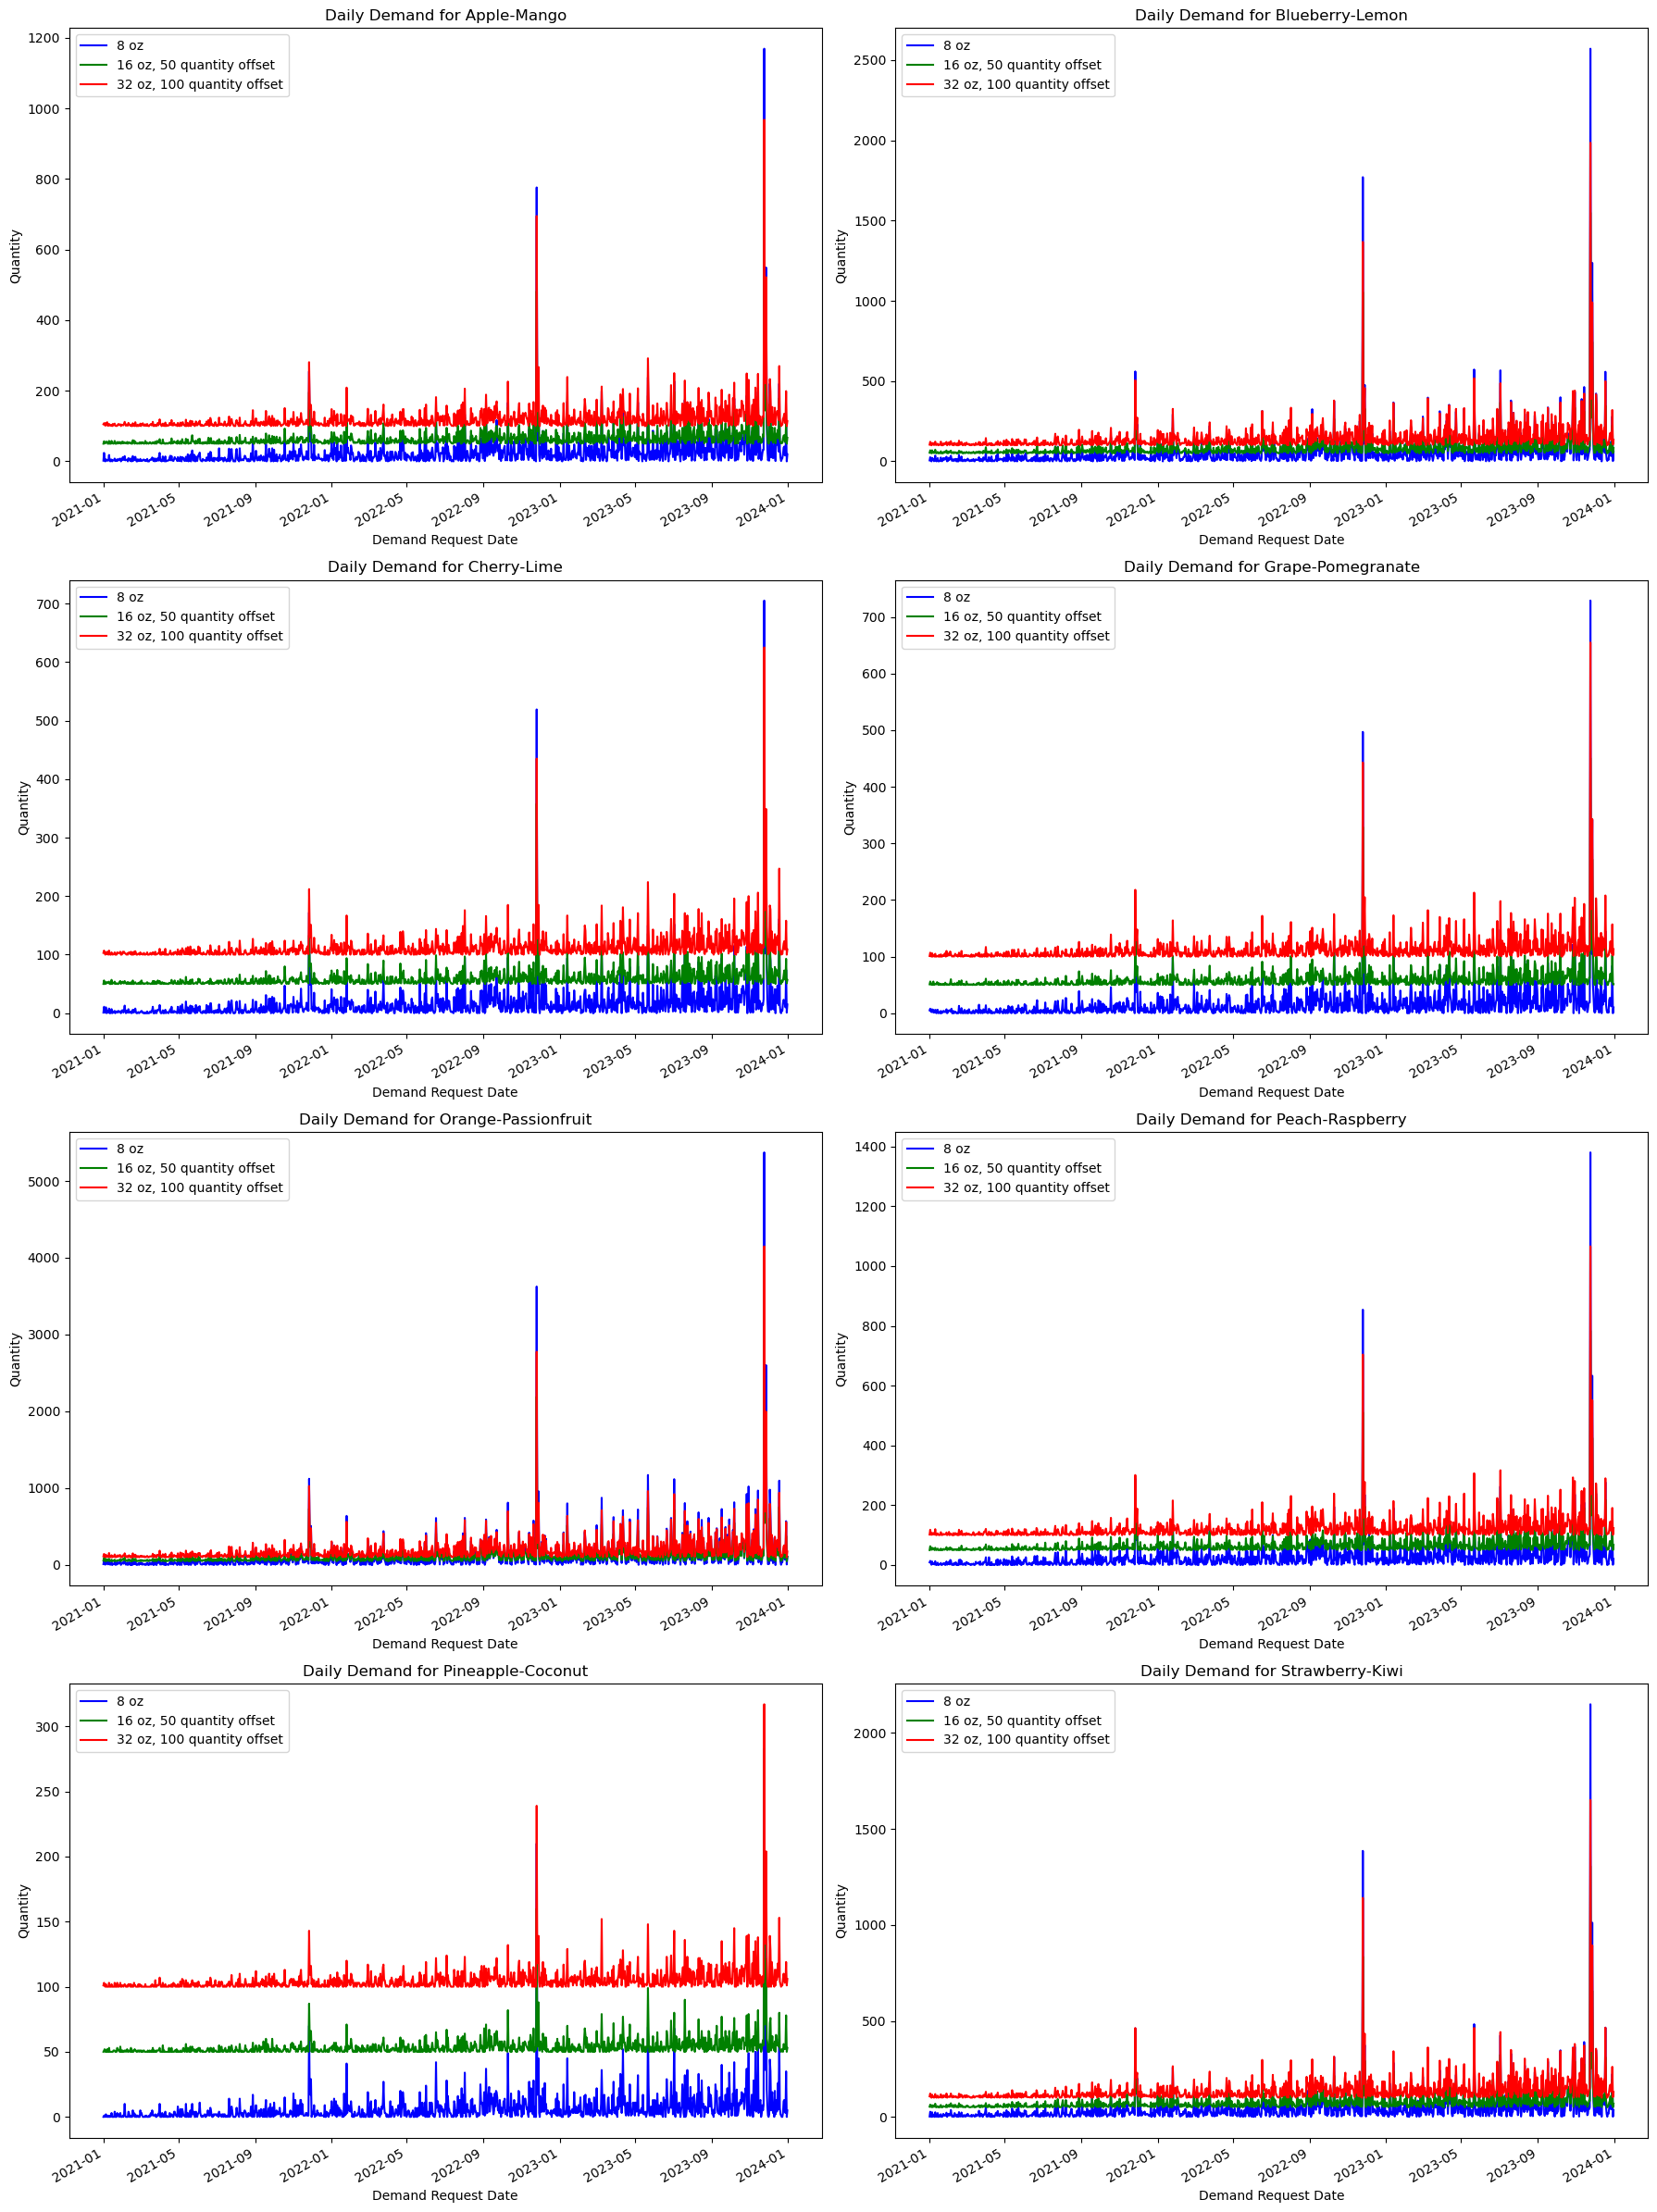

In [3]:
# Make a pivot table for over demand request date
pivot_demand_request_date_by_mix = df_demand_log.pivot_table(index='demandRequest', 
                                        columns=['Mix', 'jarSize'], 
                                        values='Quantity', aggfunc='sum', fill_value=0)

# Create the subplots with a 4x2 structure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define colors for each jar size
colors = ['blue', 'green', 'red']

i = 0
for n, mix in enumerate(pivot_demand_request_date_by_mix.columns.levels[0]):
    # Plot with vertical offsets and specified colors
    pivot_demand_request_date_by_mix[(mix, 8)].add(0).plot(ax=axes[i], label='8 oz', color=colors[0])
    pivot_demand_request_date_by_mix[(mix, 16)].add(50).plot(ax=axes[i], label='16 oz, 50 quantity offset', color=colors[1])
    pivot_demand_request_date_by_mix[(mix, 32)].add(100).plot(ax=axes[i], label='32 oz, 100 quantity offset', color=colors[2])

    # Add labels and title
    axes[i].set_xlabel('Demand Request Date')
    axes[i].set_ylabel('Quantity')
    axes[i].set_title(f'Daily Demand for {mix}')
    axes[i].legend()
    i += 1

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In general, 8oz products have the most demand, with 32oz being the next highest. The pineapple-coconut flavor has the least demand with orange-passionfruit having the most. The demand patterns look mostly the same, regardless of product type.

### State Demand Histories

This shows the demand history in all 50 states. It is hard to see, so the next graph zooms in to see relevant detail.

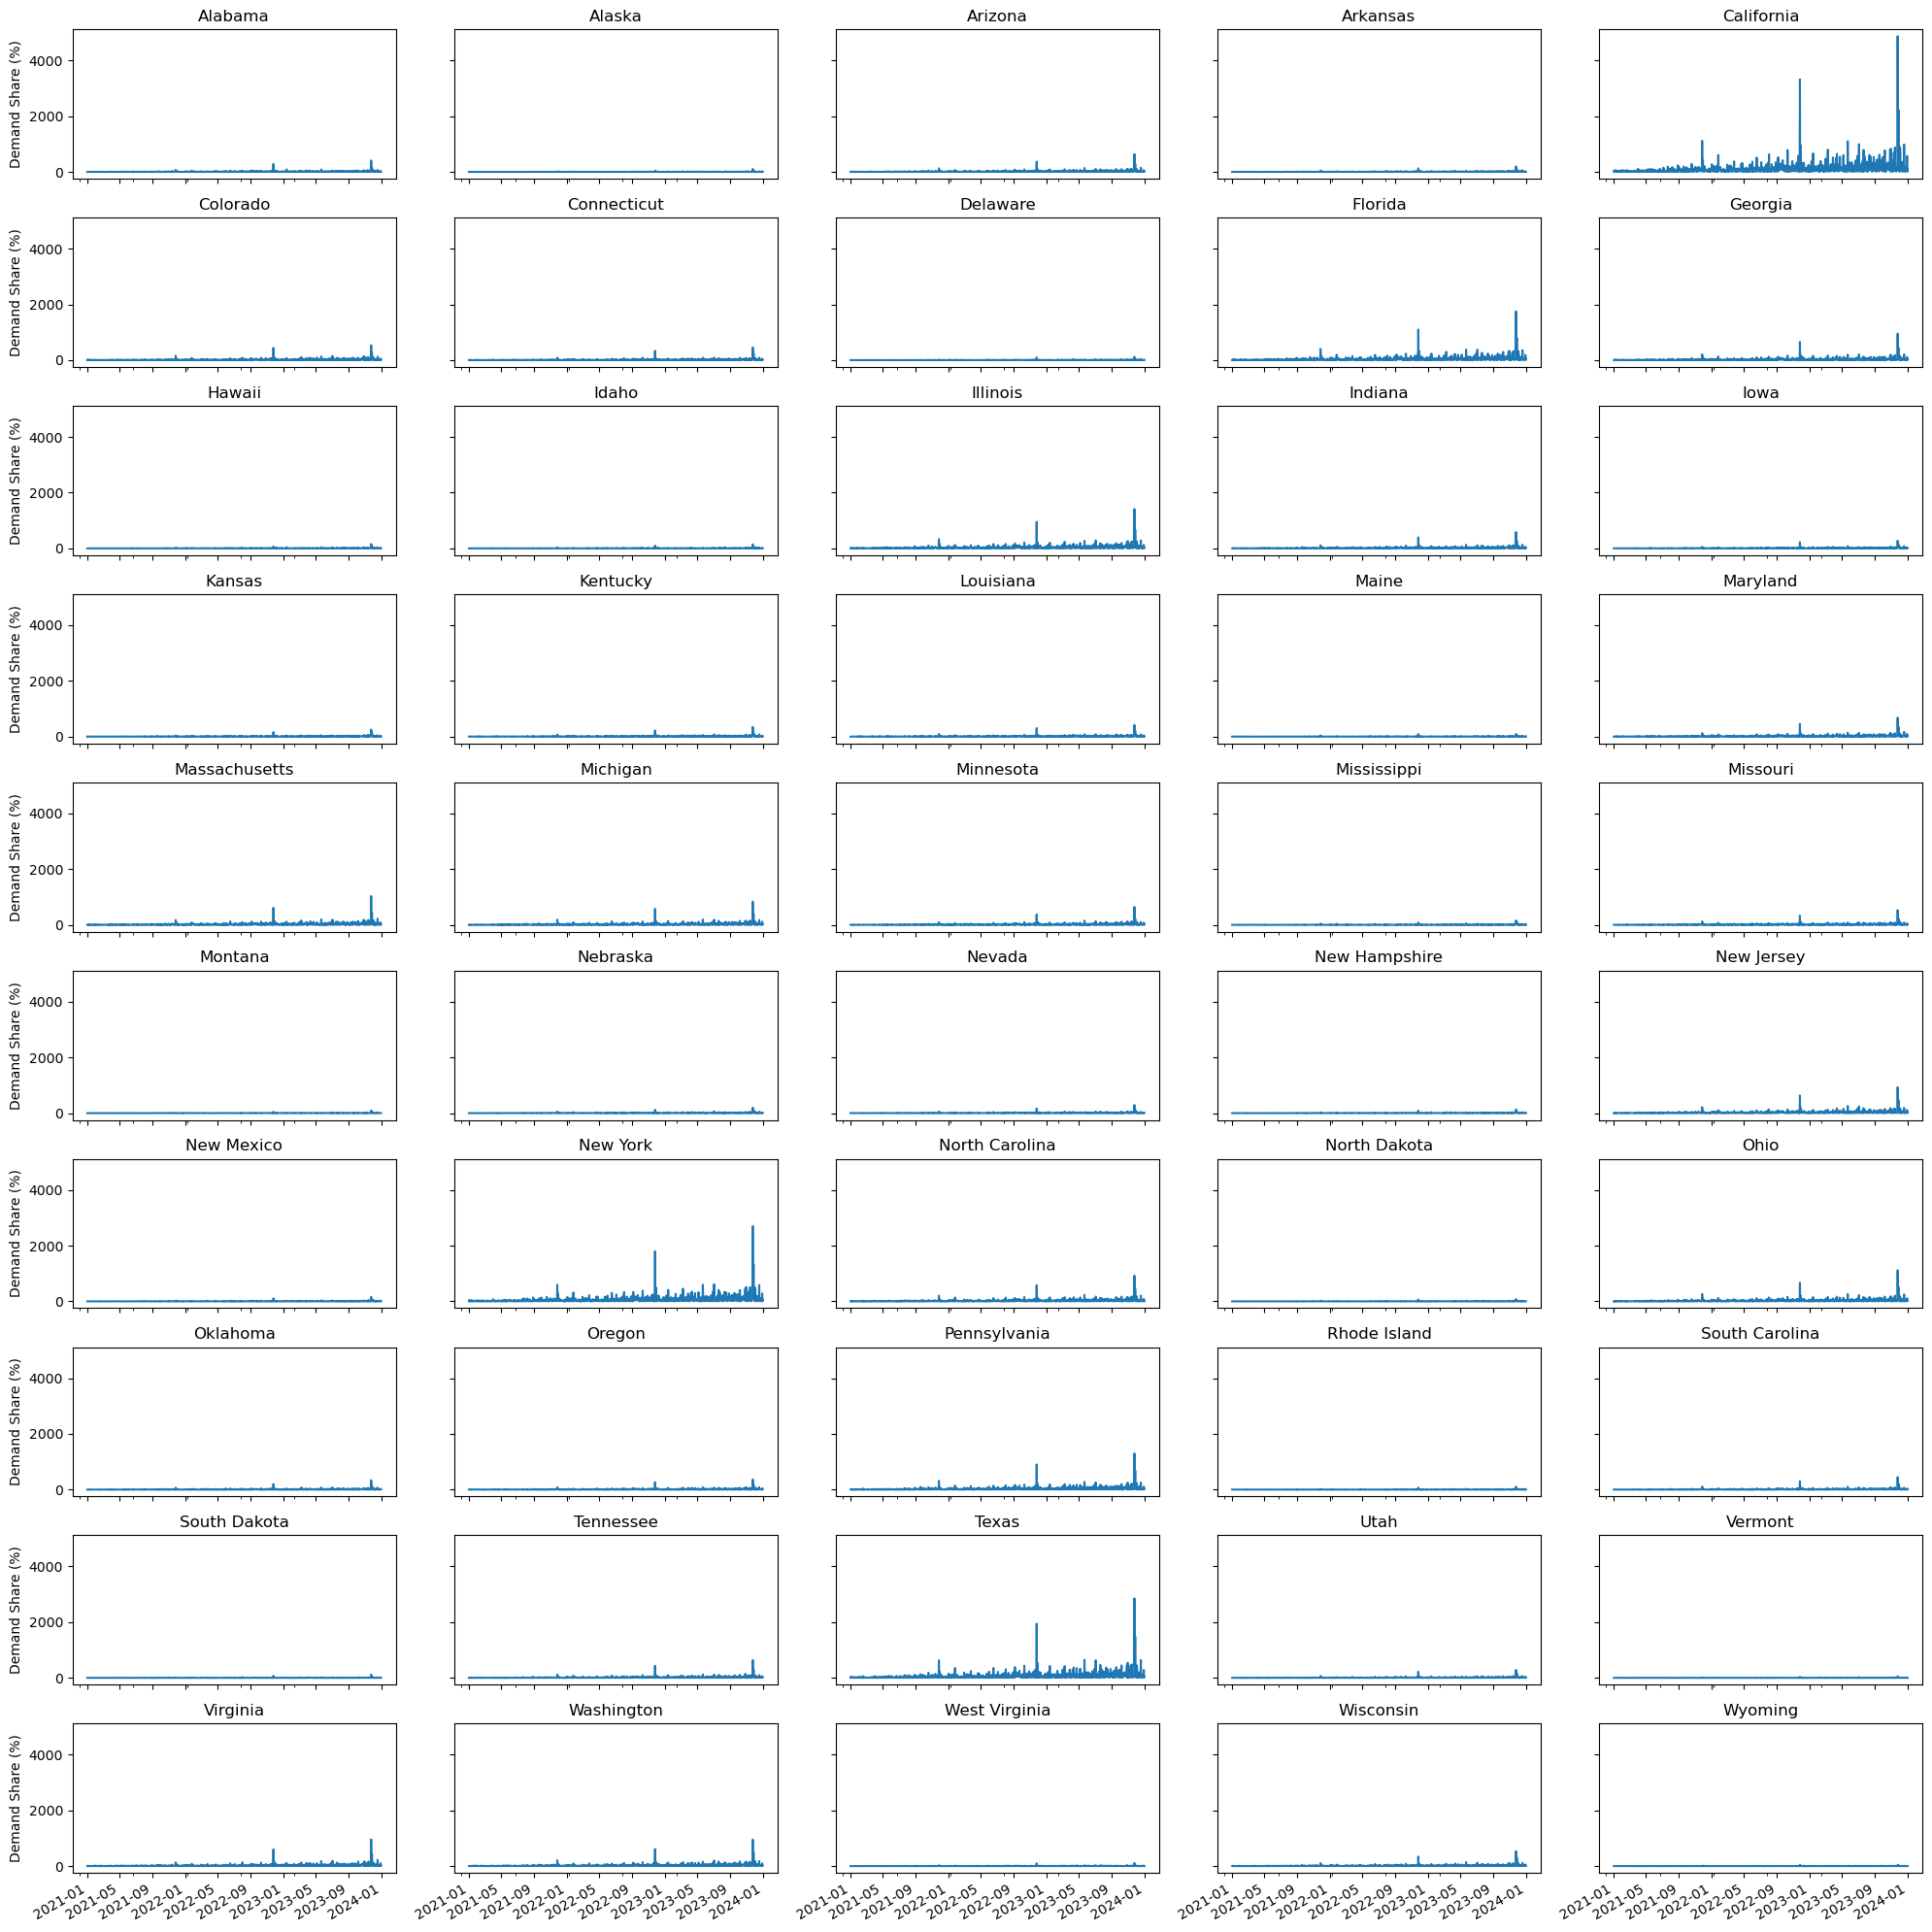

In [ ]:
# Create a pivot table indexed by demand request date with all states
pivot_demand_by_state = df_demand_log.pivot_table(index='demandRequest', 
                                                             columns='State', 
                                                             values='Quantity', 
                                                             aggfunc='sum', 
                                                             fill_value=0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, state in enumerate(pivot_demand_by_state.columns):
    pivot_demand_by_state[state].plot(ax=axes[i], title=state)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Demand Share (%)')

plt.tight_layout()
plt.show()

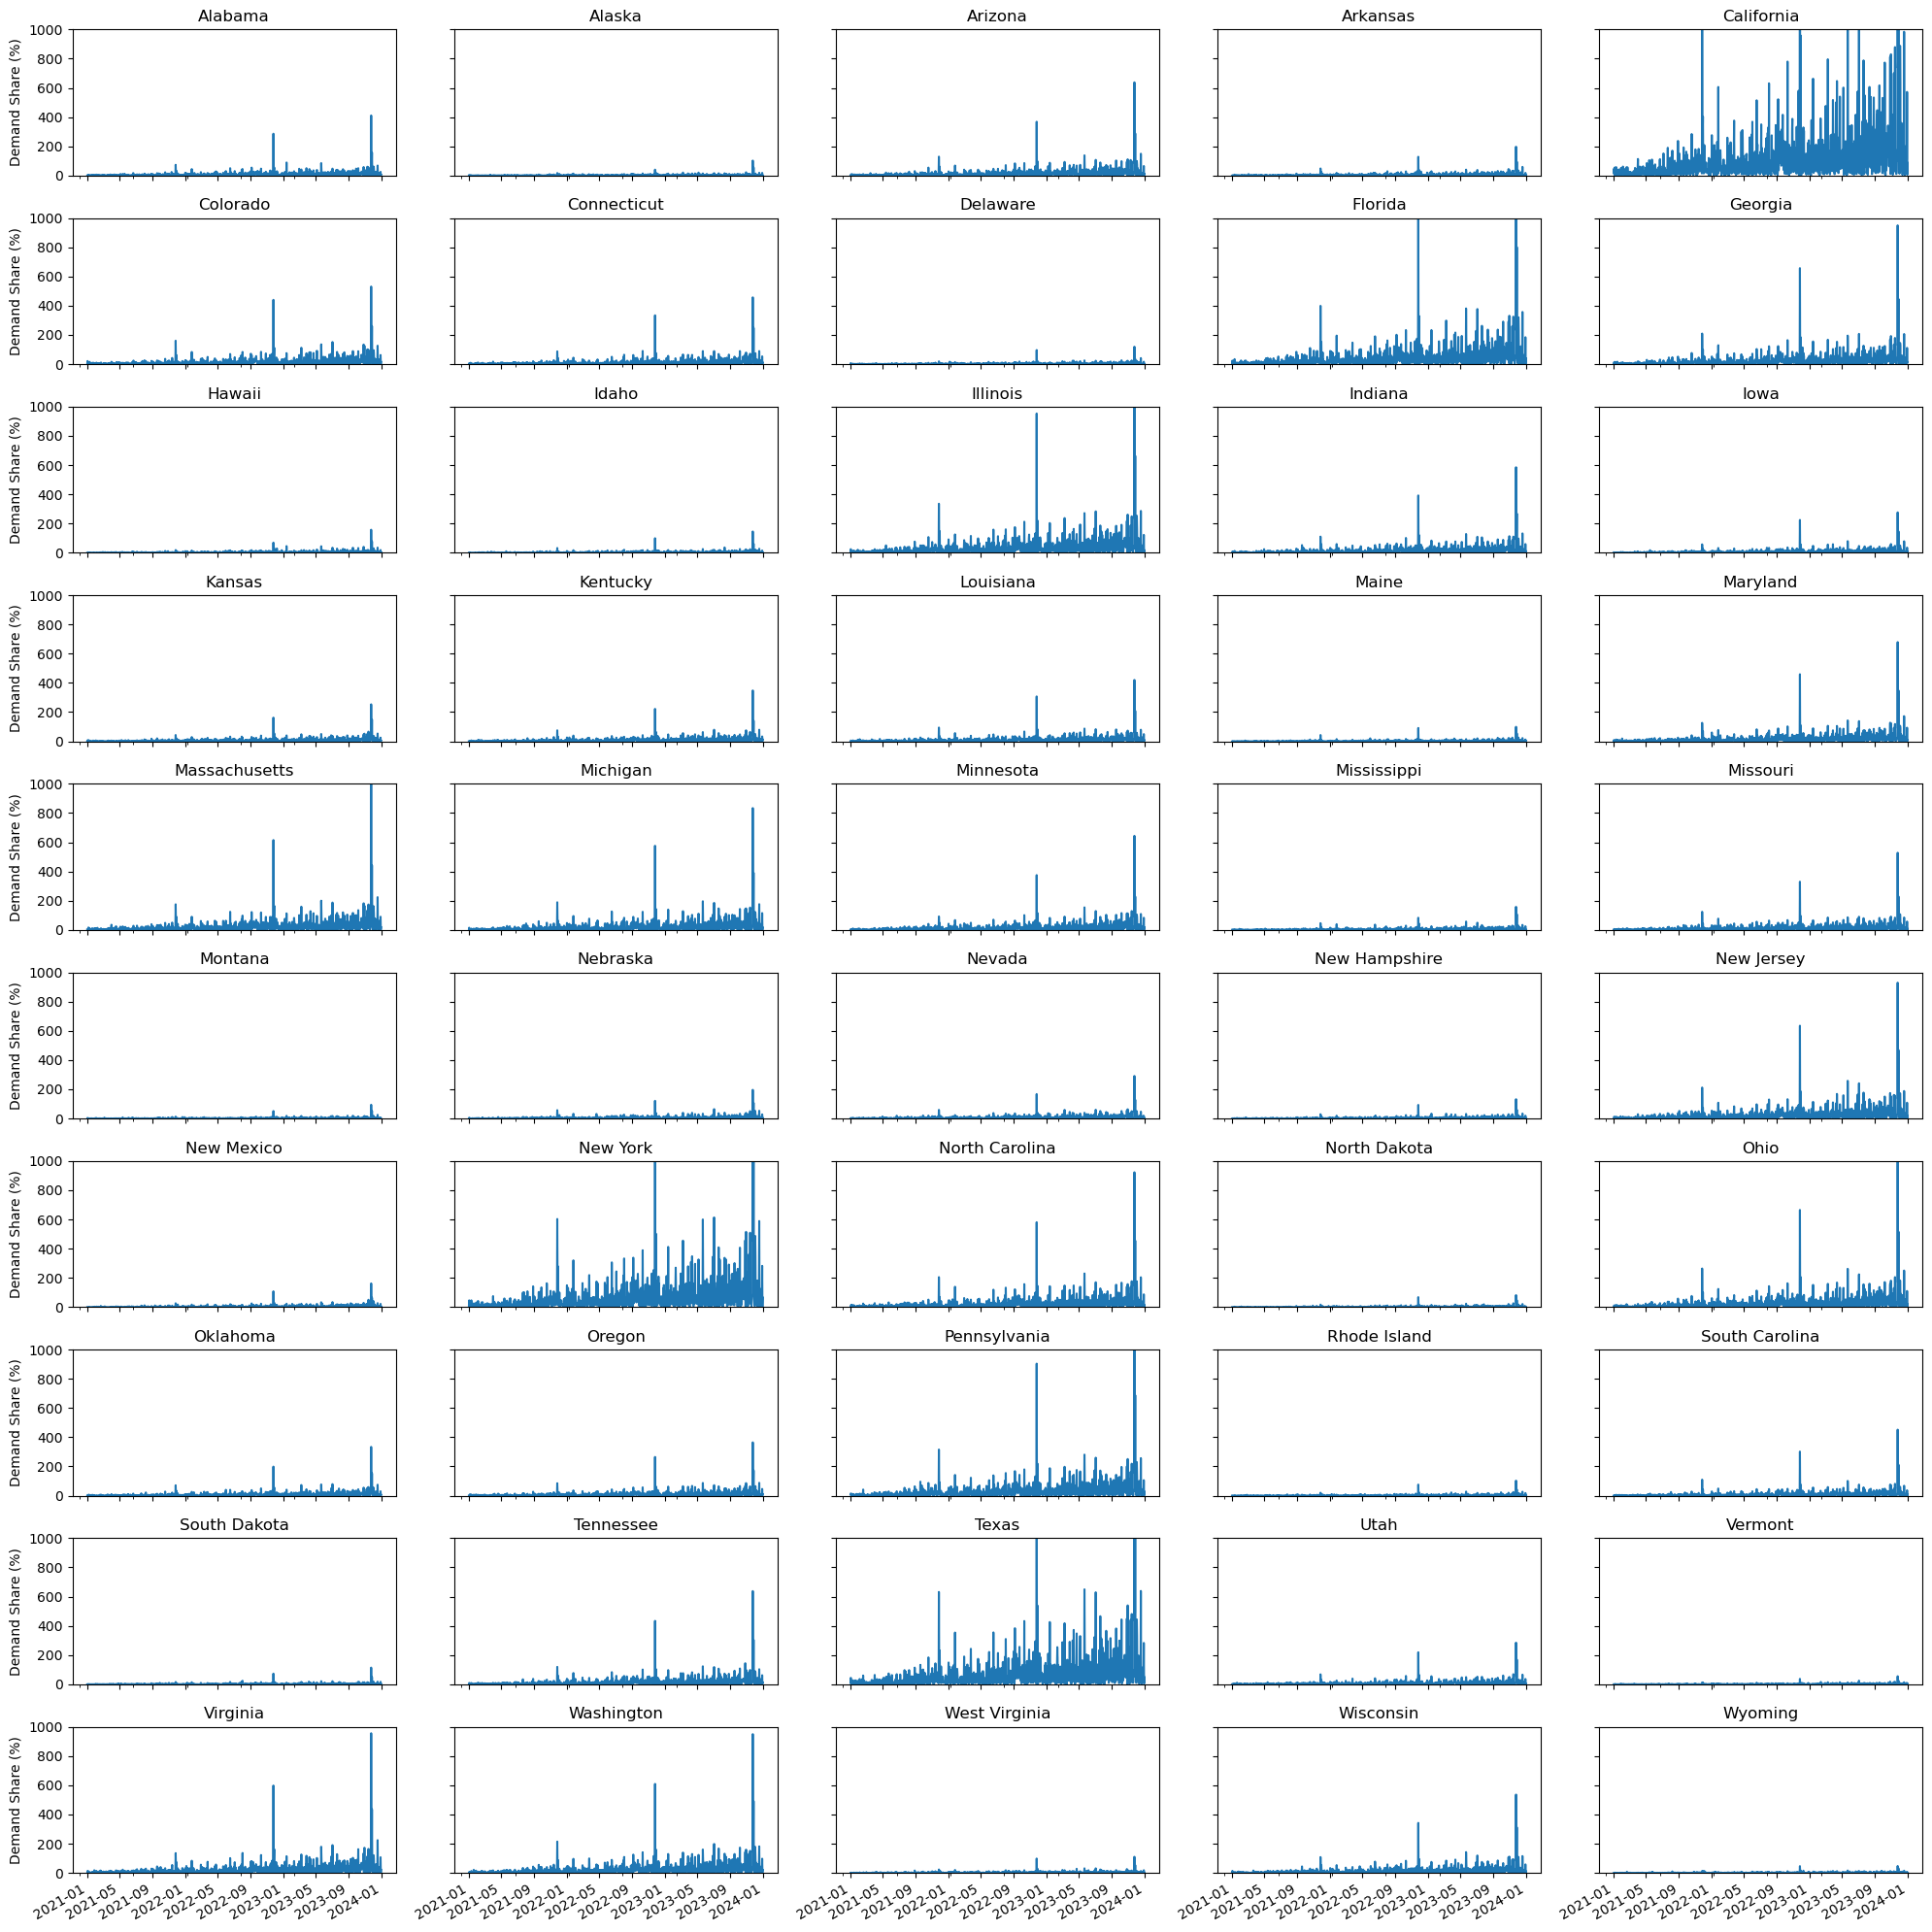

In [ ]:
# Create a pivot table indexed by demand request date with all states
pivot_demand_by_state = df_demand_log.pivot_table(index='demandRequest', 
                                                             columns='State', 
                                                             values='Quantity', 
                                                             aggfunc='sum', 
                                                             fill_value=0)

fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, state in enumerate(pivot_demand_by_state.columns):
    pivot_demand_by_state[state].plot(ax=axes[i], title=state)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Demand Share (%)')
    axes[i].set_ylim(0, 1000)

plt.tight_layout()
plt.show()

Many states have nearly no demand, such as Wyoming and Vermont. Of course, the states with large populations have large demand, such as California, New York, and Texas.

### Total Demand History

These graphs show total demand per request date along with the yearly averages. The second graph is zoomed in for clarity.

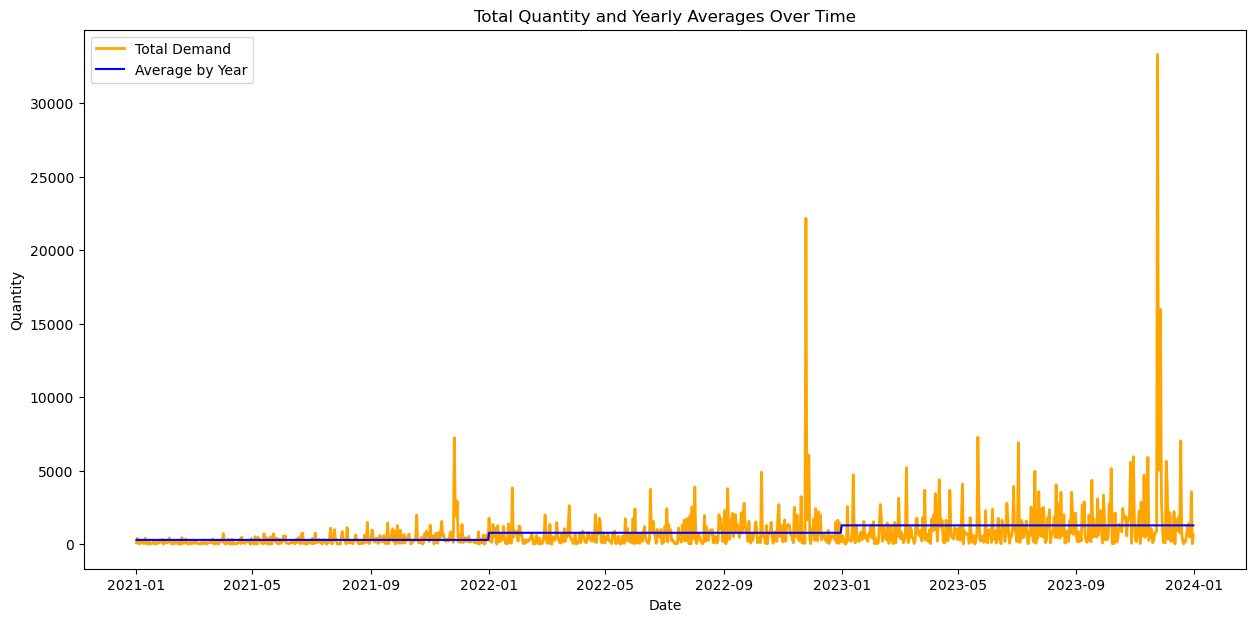

In [14]:
# Make a pivot table for over demand request date
pivot_demand_request_date = df_demand_log.pivot_table(index='demandRequest', 
                                        values='Quantity', aggfunc='sum', fill_value=0)

# Calculate the average quantity for each year and match the last day
average_quantity_by_year = pivot_demand_request_date.resample('YE').mean()

# Refine average quantity by year to make a proper line plot
for i in average_quantity_by_year.index:
    year = pd.to_datetime(f'{i.year}-01-01')
    new_row = pd.DataFrame({'Quantity': [average_quantity_by_year.loc[i, 'Quantity']]}, index=[year])
    average_quantity_by_year = pd.concat([average_quantity_by_year, new_row]).sort_index()

plt.figure(figsize=(15, 7))

plt.plot(pivot_demand_request_date.index, pivot_demand_request_date['Quantity'], label='Total Demand', linewidth=2, color='orange')
plt.plot(average_quantity_by_year.index, average_quantity_by_year['Quantity'], label='Average by Year', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Total Demand Quantity and Yearly Averages Over Time')
plt.legend()
plt.show()

In [16]:
average_quantity_by_year

Quantity
2021-01-01   294.250689
2021-12-31   294.250689
2022-01-01   778.260274
2022-12-31   778.260274
2023-01-01  1282.857534
2023-12-31  1282.857534

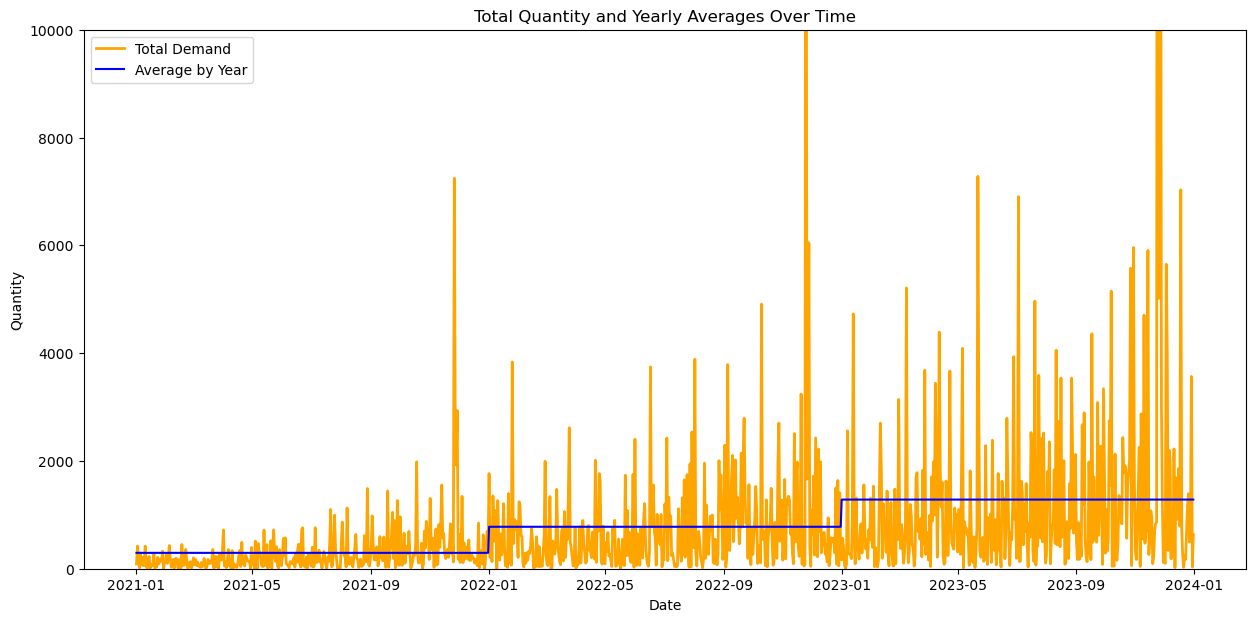

In [15]:
plt.figure(figsize=(15, 7))

plt.plot(pivot_demand_request_date.index, pivot_demand_request_date['Quantity'], label='Total Demand', linewidth=2, color='orange')
plt.plot(average_quantity_by_year.index, average_quantity_by_year['Quantity'], label='Average by Year', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Total Demand Quantity and Yearly Averages Over Time')
plt.ylim(0, 10000)
plt.legend()
plt.show()

Clearly the promotion during cyberweek has a huge affect on demand, with each one making average yearly demand jump up by around 500 units.

### Demand History by Earliest, Preferred, and Latest Delivery Dates

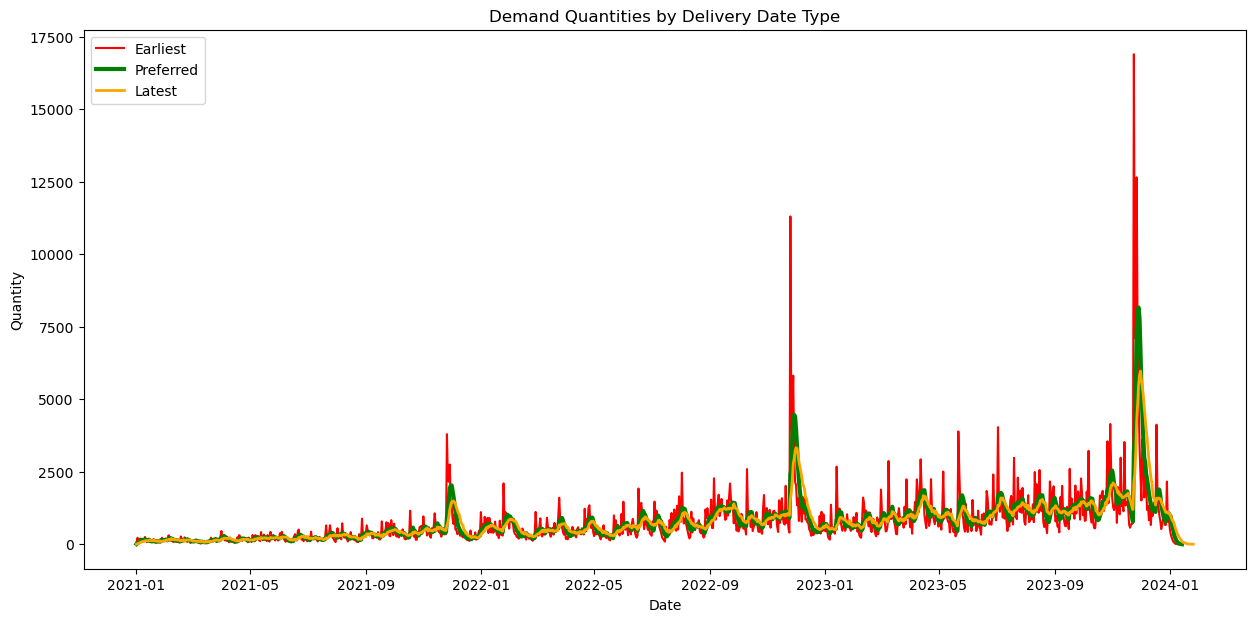

In [18]:
# Create a pivot table indexed by preferred delivery date
pivot_preferred_delivery_date = df_demand_log.pivot_table(index='preferredDelivery', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

pivot_earliest_delivery_date = df_demand_log.pivot_table(index='earliestDelivery', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

pivot_latest_delivery_date = df_demand_log.pivot_table(index='latestDelivery', 
                                                        values='Quantity',
                                                        aggfunc='sum', 
                                                        fill_value=0)

# Plot all three pivot tables on the same graph
plt.figure(figsize=(15, 7))
plt.plot(pivot_earliest_delivery_date.index, pivot_earliest_delivery_date['Quantity'], label='Earliest', color='r')
plt.plot(pivot_preferred_delivery_date.index, pivot_preferred_delivery_date['Quantity'], label='Preferred', linewidth=3, color="g")
plt.plot(pivot_latest_delivery_date.index, pivot_latest_delivery_date['Quantity'], label='Latest', linewidth=2, color='orange')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Demand Quantities by Delivery Date Type')
plt.legend()
plt.show()

If FruitSoul tries to meet demand by earliest date, they will have a hard time as it spikes in many places. Meeting demand via preferred, latest, or a more realistically blended approach will result in smoother operations.

### Smoothing Demand with Averages

This function takes a dataframe and x number of days with highest demand that we want to smooth, and returns a pivot table with that smoothing done.

In [22]:
def smoothing_top_demand(df, x):
    # Create a pivot table indexed by demand request date with columns for quantity and all three delivery dates
    pivot_table = df.pivot_table(index='demandRequest', 
                                        values=['Quantity', 'earliestDelivery', 'preferredDelivery', 'latestDelivery'], 
                                        aggfunc={'Quantity': 'sum', 
                                                 'earliestDelivery': 'first', 
                                                 'preferredDelivery': 'first', 
                                                 'latestDelivery': 'first'},
                                        fill_value=0)

    # Create a new DataFrame to store the top x dates with highest quantity
    smoothed_top_rows = []
    top_demand_dates = pivot_table.nlargest(x, 'Quantity')
    pivot_table.loc[top_demand_dates.index, 'Quantity'] = 0

    # Iterate over the rows of the top_demand_dates DataFrame
    for _, row in top_demand_dates.iterrows():
        start_date = pd.to_datetime(row['earliestDelivery'])
        end_date = pd.to_datetime(row['latestDelivery'])
        quantity = row['Quantity']

        # Generate date range as a list
        date_range = pd.date_range(start=start_date, end=end_date)

        # Calculate the quantity to be distributed to each date
        daily_quantity = quantity / len(date_range)

        # Iterate over the date range and add a new row for each date with the daily quantity
        for date in date_range:
            smoothed_top_rows.append({'Date': date, 'Quantity': daily_quantity})

    # Create a new DataFrame from the expanded rows
    smoothed_top_rows_df = pd.DataFrame(smoothed_top_rows)

    # Create a pivot table to aggregate the quantities by date
    pivot_temp = smoothed_top_rows_df.pivot_table(index='Date', values='Quantity', aggfunc='sum')

    # Ensure the 'Date' column in pivot_temp is of datetime type
    pivot_temp.index = pd.to_datetime(pivot_temp.index)

    # Add the quantities from pivot_temp to the corresponding dates in pivot_table
    pivot_table['Quantity'] = pivot_table['Quantity'].add(pivot_temp['Quantity'], fill_value=0)
    
    return pivot_table

This code smoothes the top x = 100 demand request dates and shows this on top of untouched total demand.

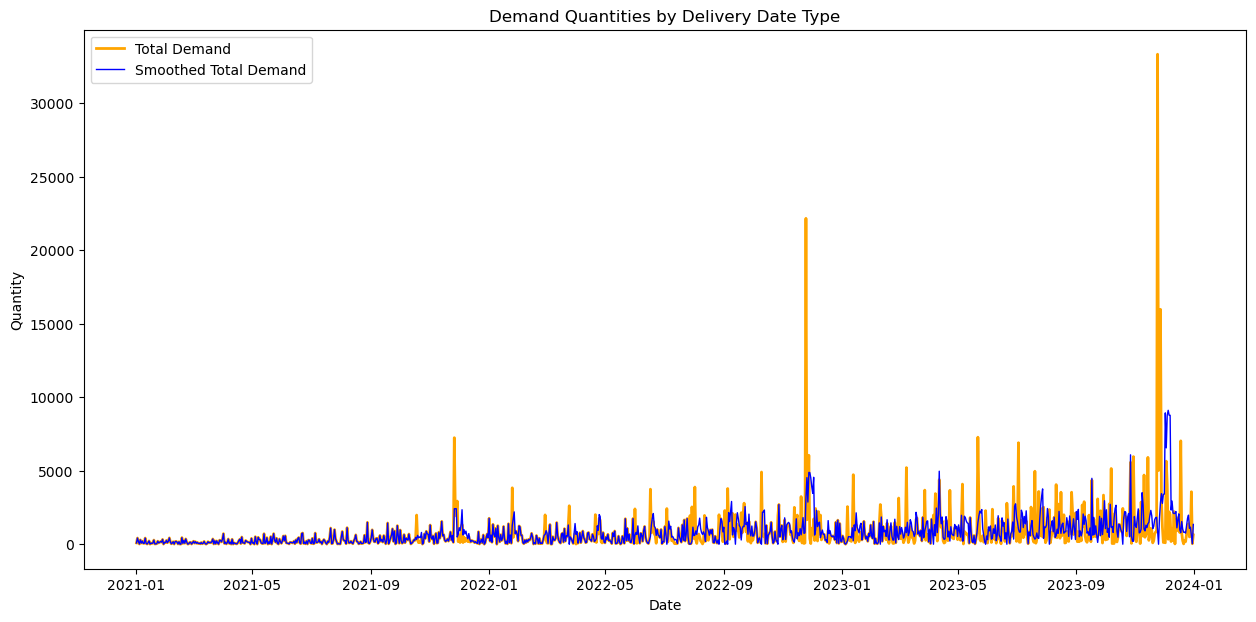

In [40]:
smoothed_total_demand = smoothing_top_demand(df_demand_log, 100)

# Reset the index to ensure proper plotting
smoothed_total_demand.reset_index(inplace=True)

plt.figure(figsize=(15, 7))
plt.plot(pivot_demand_request_date.index, pivot_demand_request_date['Quantity'], label='Total Demand', linewidth=2, color='orange')
plt.plot(smoothed_total_demand['demandRequest'], smoothed_total_demand['Quantity'], label='Smoothed Total Demand', linewidth=1, color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Demand Quantities by Delivery Date Type')
plt.legend()
plt.show()


By spreading out some of the largest demand, it will be easier to handle orders in those peak seasons, namely Nov-Dec.

# Task 2

In [15]:
# Create a pivot table with references to plot later
pivot_demand_request_date = df_demand_log.pivot_table(index='demandRequest', values='Quantity', aggfunc='sum')
pivot_demand_request_date['Day of Week'] = pivot_demand_request_date.index.day_name()
pivot_demand_request_date['Week Number'] = (pivot_demand_request_date.index - pivot_demand_request_date.index.min()).days // 7 + 1
pivot_demand_request_date['Month Number'] = (pivot_demand_request_date.index.year - pivot_demand_request_date.index.min().year) * 12 + pivot_demand_request_date.index.month
pivot_demand_request_date

Quantity Day of Week  Week Number  Month Number
demandRequest                                                 
2021-01-01           90      Friday            1             1
2021-01-02          420    Saturday            1             1
2021-01-03          178      Sunday            1             1
2021-01-04           16      Monday            1             1
2021-01-05          294     Tuesday            1             1
...                 ...         ...          ...           ...
2023-12-27          496   Wednesday          156            36
2023-12-28          574    Thursday          156            36
2023-12-29         3568      Friday          157            36
2023-12-30           33    Saturday          157            36
2023-12-31          632      Sunday          157            36

[1093 rows x 4 columns]

In [16]:
# Find the top 20 demand request dates with the highest quantity
top_20_demand_dates = pivot_demand_request_date.nlargest(20, 'Quantity')
top_20_demand_dates

Quantity Day of Week  Week Number  Month Number
demandRequest                                                 
2023-11-24        33324      Friday          152            35
2022-11-25        22162      Friday          100            23
2023-11-27        15975      Monday          152            35
2023-05-22         7279      Monday          125            29
2021-11-26         7244      Friday           48            11
2023-12-18         7030      Monday          155            36
2023-07-03         6902      Monday          131            31
2022-11-28         6048      Monday          100            23
2023-10-30         5959      Monday          148            34
2023-11-14         5906     Tuesday          150            35
2023-12-03         5649      Sunday          153            36
2023-10-27         5574      Friday          148            34
2023-11-26         5502      Sunday          152            35
2023-03-09         5209    Thursday          114            27
2023-10-07         5149    Saturday          145            34
2023-11-25         5014    Saturday          152            35
2023-07-20         4965    Thursday          133            31
2022-10-10         4910      Monday           93            22
2023-01-13         4728      Friday          107            25
2023-11-10         4705      Friday          150            35

This shows that the November Cyber Week promotion brings in a lot of demand. They must also have a promotion around May, and possibly July.

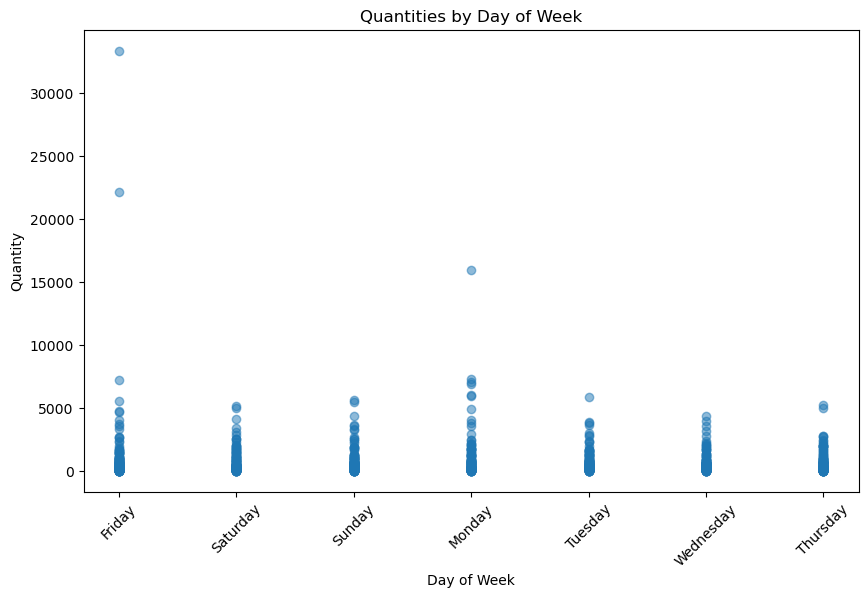

In [17]:
# Plot the days of week with their quantities on a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pivot_demand_request_date['Day of Week'], pivot_demand_request_date['Quantity'], alpha=0.5)
plt.title('Quantities by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()

Here we see the day of week seasonality. Friday and Monday have the most.

In [18]:
pivot_demand_request_date_copy = pivot_demand_request_date.copy()
# Set the highest three values for pivot_demand_request_date_copy to have quantities equal to 7200, approximately the fourth highest value
pivot_demand_request_date_copy.loc[pivot_demand_request_date_copy['Quantity'].nlargest(3).index, 'Quantity'] = 7200
pivot_avg_quantity_by_day_of_week = pivot_demand_request_date_copy.pivot_table(index='Day of Week', values='Quantity', aggfunc='mean')
pivot_avg_quantity_by_day_of_week

Quantity
Day of Week            
Friday       871.566879
Monday       911.807692
Saturday     726.820513
Sunday       716.847134
Thursday     646.641026
Tuesday      702.333333
Wednesday    605.245161

Replacing the three outliers above with similar quantities and finding the average of all days of the week, it's clear Friday and Monday have the most demand and Wednesday and Thursday having the least. 

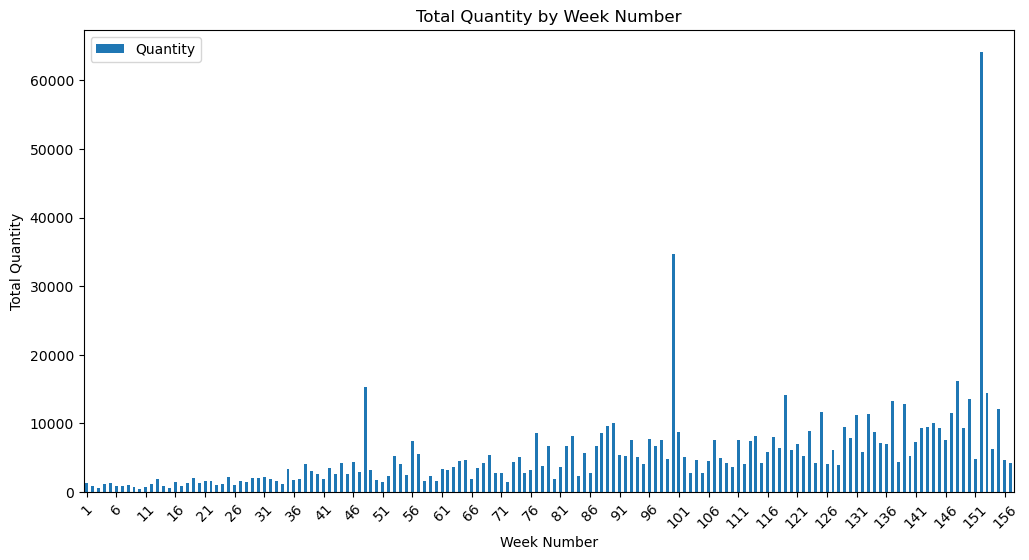

In [19]:
pivot_demand_by_week_number = pivot_demand_request_date.pivot_table(index='Week Number', values='Quantity', aggfunc='sum')
pivot_demand_by_week_number.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity by Week Number')
plt.xlabel('Week Number')
plt.ylabel('Total Quantity')
plt.xticks(ticks=range(0, len(pivot_demand_by_week_number), 5), labels=range(1, len(pivot_demand_by_week_number) + 1, 5), rotation=45)
plt.show()

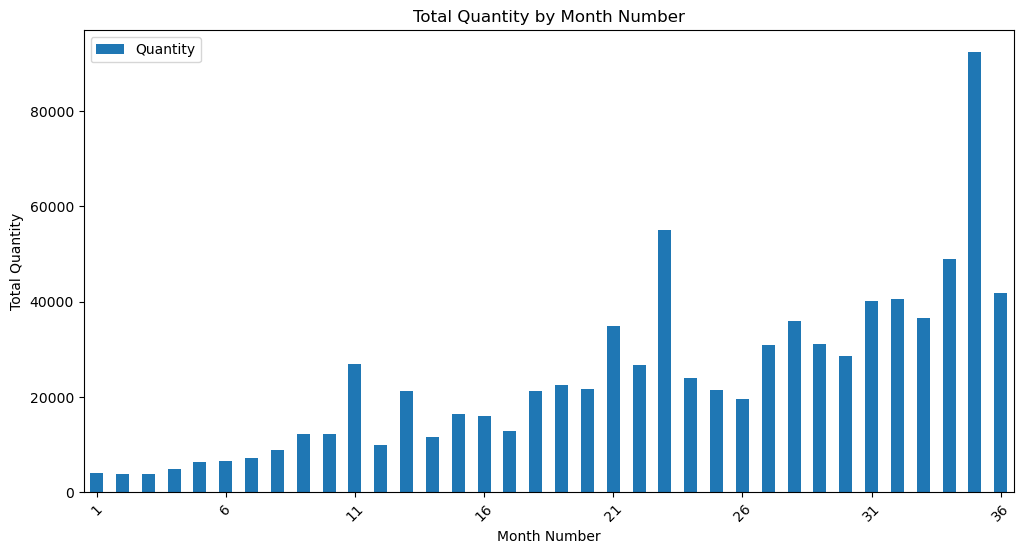

In [20]:
pivot_demand_by_month_number = pivot_demand_request_date.pivot_table(index='Month Number', values='Quantity', aggfunc='sum')
pivot_demand_by_month_number.plot(kind='bar', figsize=(12, 6))
plt.title('Total Quantity by Month Number')
plt.xlabel('Month Number')
plt.ylabel('Total Quantity')
plt.xticks(ticks=range(0, len(pivot_demand_by_month_number), 5), labels=range(1, len(pivot_demand_by_month_number) + 1, 5), rotation=45)
plt.show()

Besides the obvious spike in November in all years, there is a drop-rise in February-March and May-June for 2022 and February-March and June-July in 2023.

# Task 3

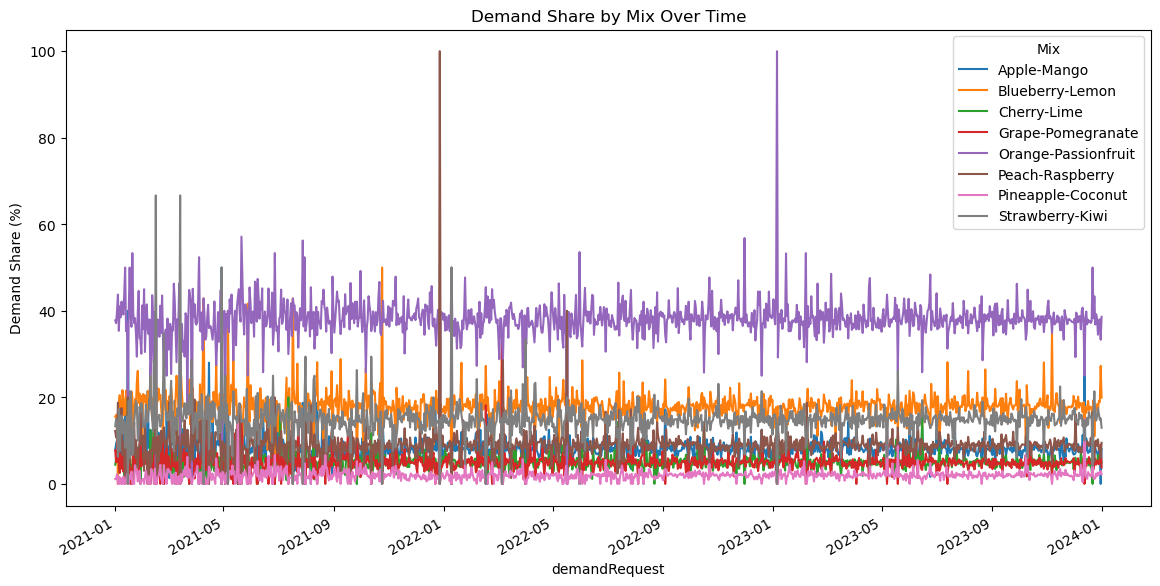

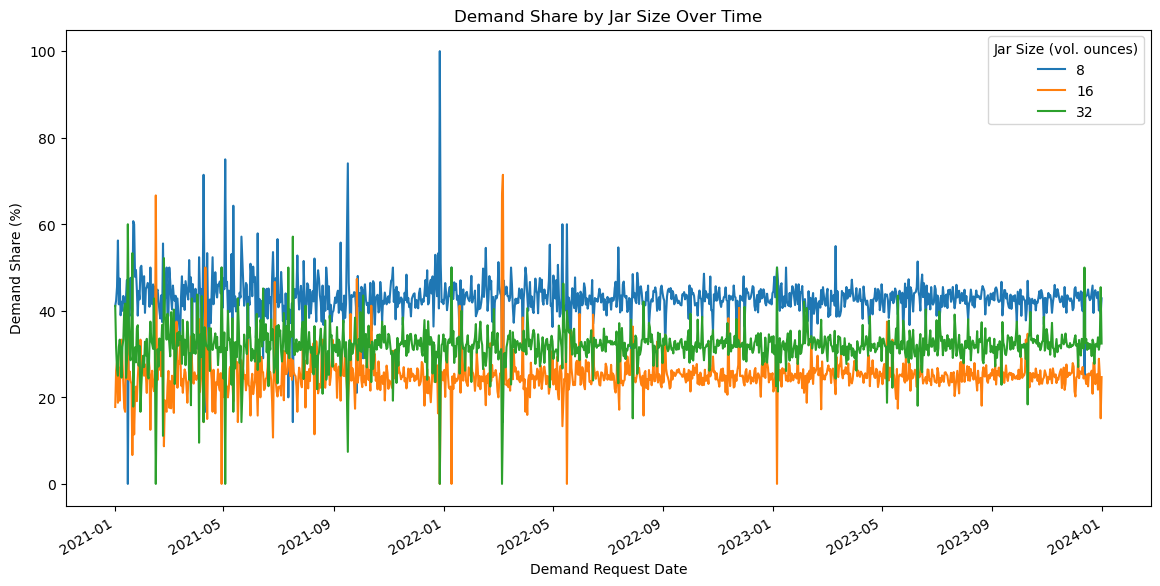

In [41]:
# Create a pivot table with index 'Demand Request Date' and columns 'Mix' and 'jarSize'
pivot_product_quantities_shares = df_demand_log.pivot_table(index='demandRequest',
                                                     columns=['Mix', 'jarSize'],
                                                     values='Quantity', aggfunc='sum', fill_value=0)

# Normalize the quantities to be the percentage of total quantity among each row
pivot_product_quantities_shares = pivot_product_quantities_shares.div(pivot_product_quantities_shares.sum(axis=1), axis=0) * 100

# Create a pivot table with index 'demandRequest' and columns 'Mix'
pivot_mixes_shares = pivot_product_quantities_shares.T.groupby(level=0).sum().T

# Create a pivot table with index 'demandRequest' and columns 'jarSize'
pivot_jar_sizes_shares = pivot_product_quantities_shares.T.groupby(level=1).sum().T

# Plot the pivot table for mixes shares
pivot_mixes_shares.plot(kind='line', figsize=(14, 7))
plt.title('Demand Share by Mix Over Time')
plt.xlabel('demandRequest')
plt.ylabel('Demand Share (%)')
plt.legend(title='Mix')
plt.show()

# Plot the pivot table for jar sizes shares
pivot_jar_sizes_shares.plot(kind='line', figsize=(14, 7))
plt.title('Demand Share by Jar Size Over Time')
plt.xlabel('Demand Request Date')
plt.ylabel('Demand Share (%)')
plt.legend(title='Jar Size (vol. ounces)')
plt.show()

There is a lot of fluctuations in these graphs. Below are the quarterly averages to see trends more clearly.

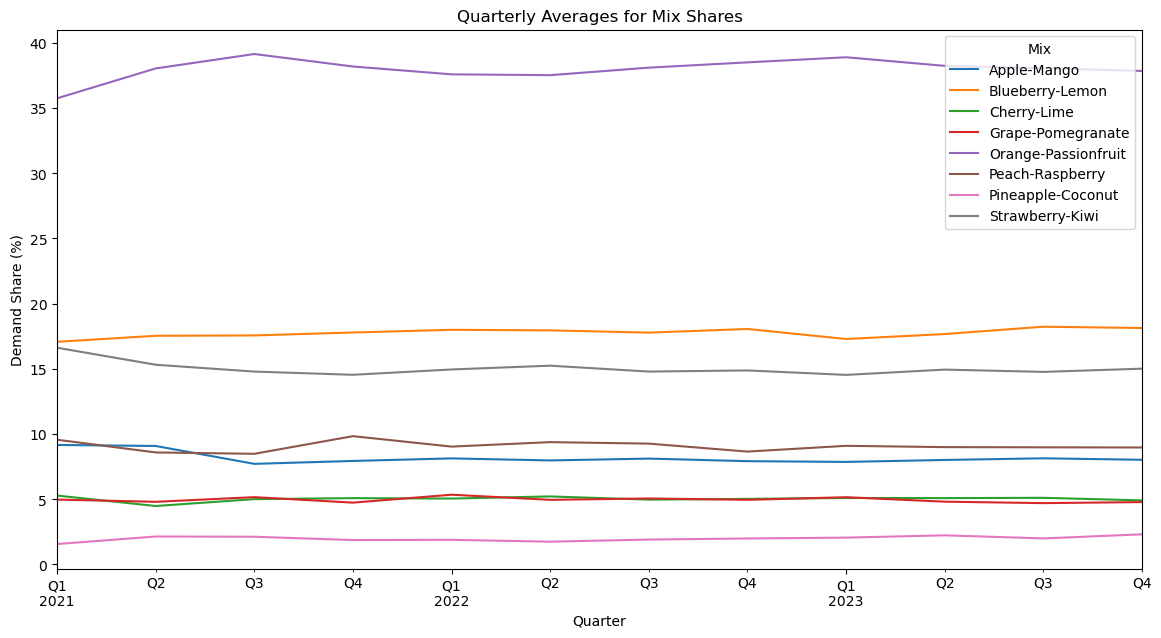

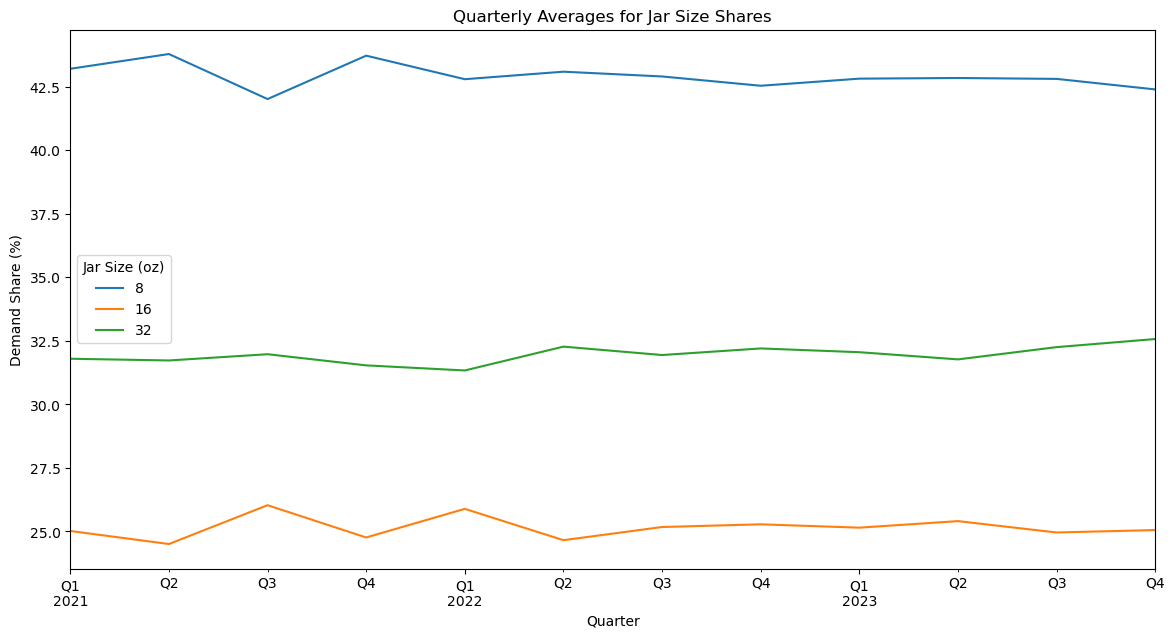

In [53]:
# Resample the pivot table to quarterly frequency and calculate the mean for each mix
quarterly_averages_mix_shares = pivot_mixes_shares.resample('QE').mean()

# Plot the quarterly averages for mix shares
quarterly_averages_mix_shares.plot(kind='line', figsize=(14, 7))
plt.title('Quarterly Averages for Mix Shares')
plt.xlabel('Quarter')
plt.ylabel('Demand Share (%)')
plt.legend(title='Mix')
plt.show()

# Resample the pivot table to quarterly frequency and calculate the mean for each jar size
quarterly_averages = pivot_jar_sizes_shares.resample('QE').mean()
quarterly_averages.plot(kind='line', figsize=(14, 7))
plt.title('Quarterly Averages for Jar Size Shares')
plt.xlabel('Quarter')
plt.ylabel('Demand Share (%)')
plt.legend(title='Jar Size (oz)')
plt.show()

The obvious winner is Orange-Passionfruit for mixes and the 8oz jar size for demand share. Both graphs tend to have a bit more fluctuation in 2021, but all are mostly constant in average through the three years.

# Task 4

These graphs show the total demand share by state.

In [16]:
pivot_state_demand = df_demand_log.pivot_table(index='demandRequest', columns='State', values='Quantity', aggfunc='sum', fill_value=0)
pivot_state_demand_share = pivot_state_demand.div(pivot_state_demand.sum(axis=1), axis=0) * 100

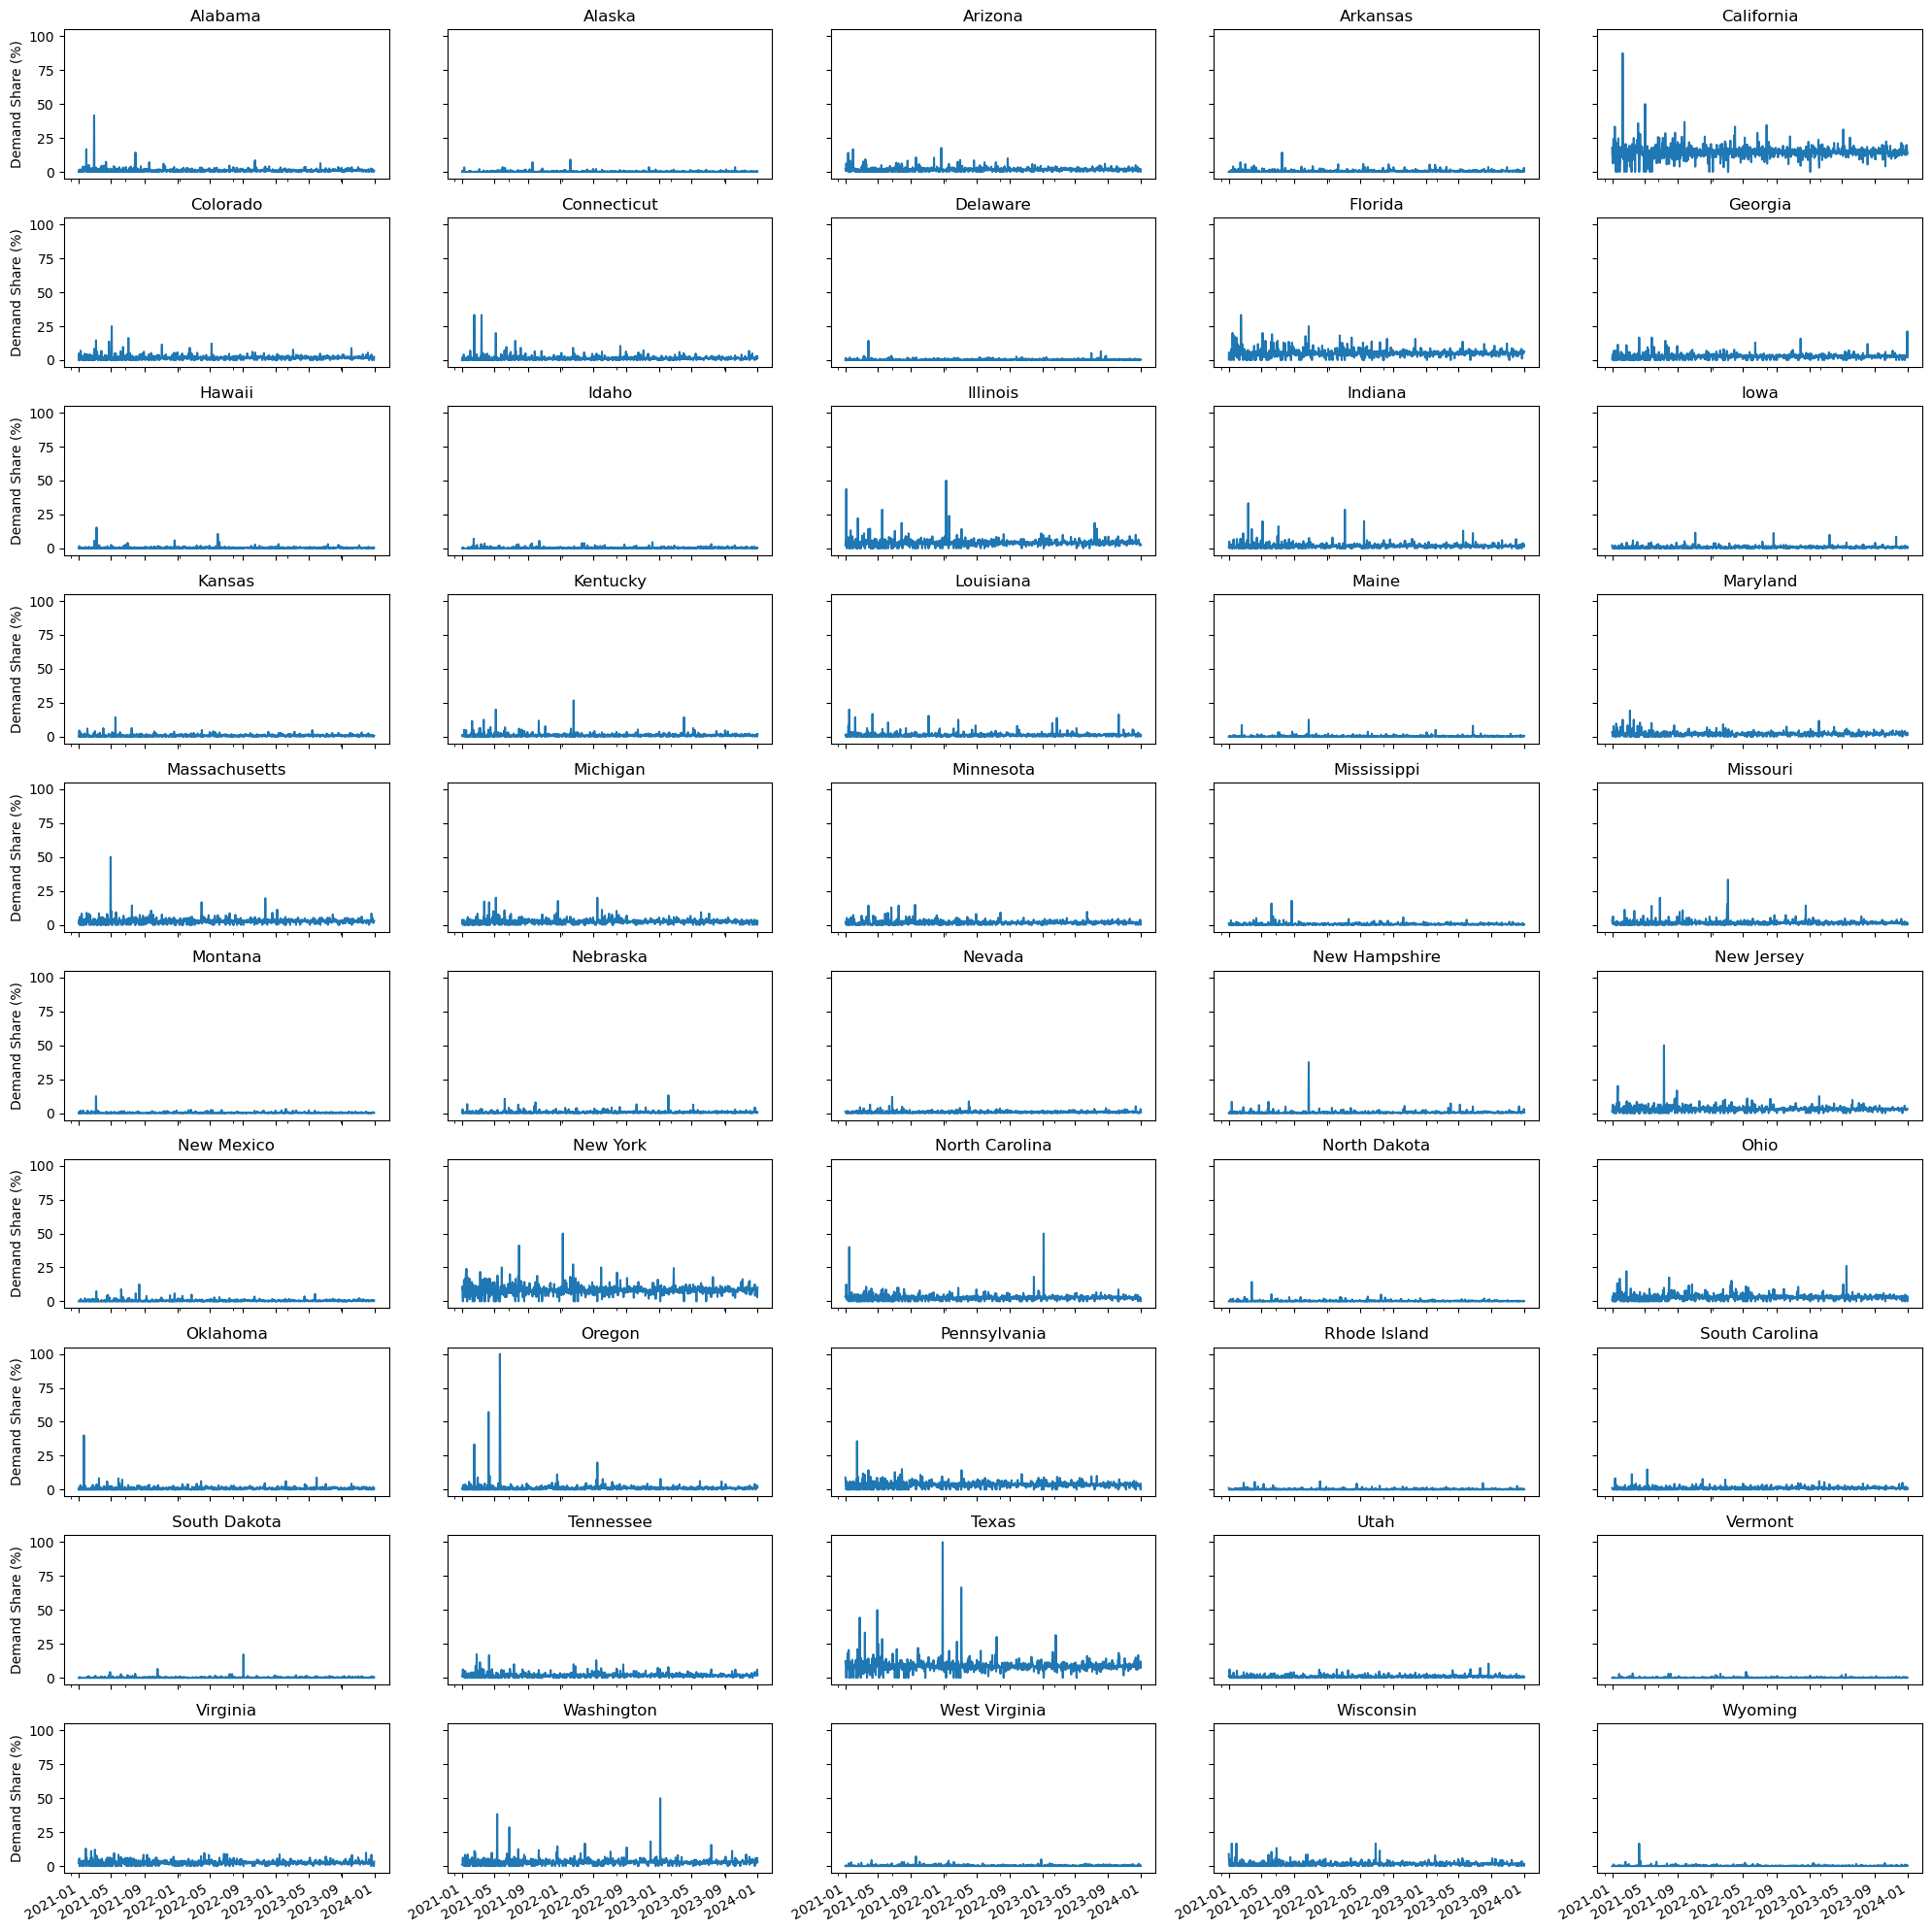

In [51]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, state in enumerate(pivot_state_demand_share.columns):
    pivot_state_demand_share[state].plot(ax=axes[i], title=state)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Demand Share (%)')

plt.tight_layout()
plt.show()

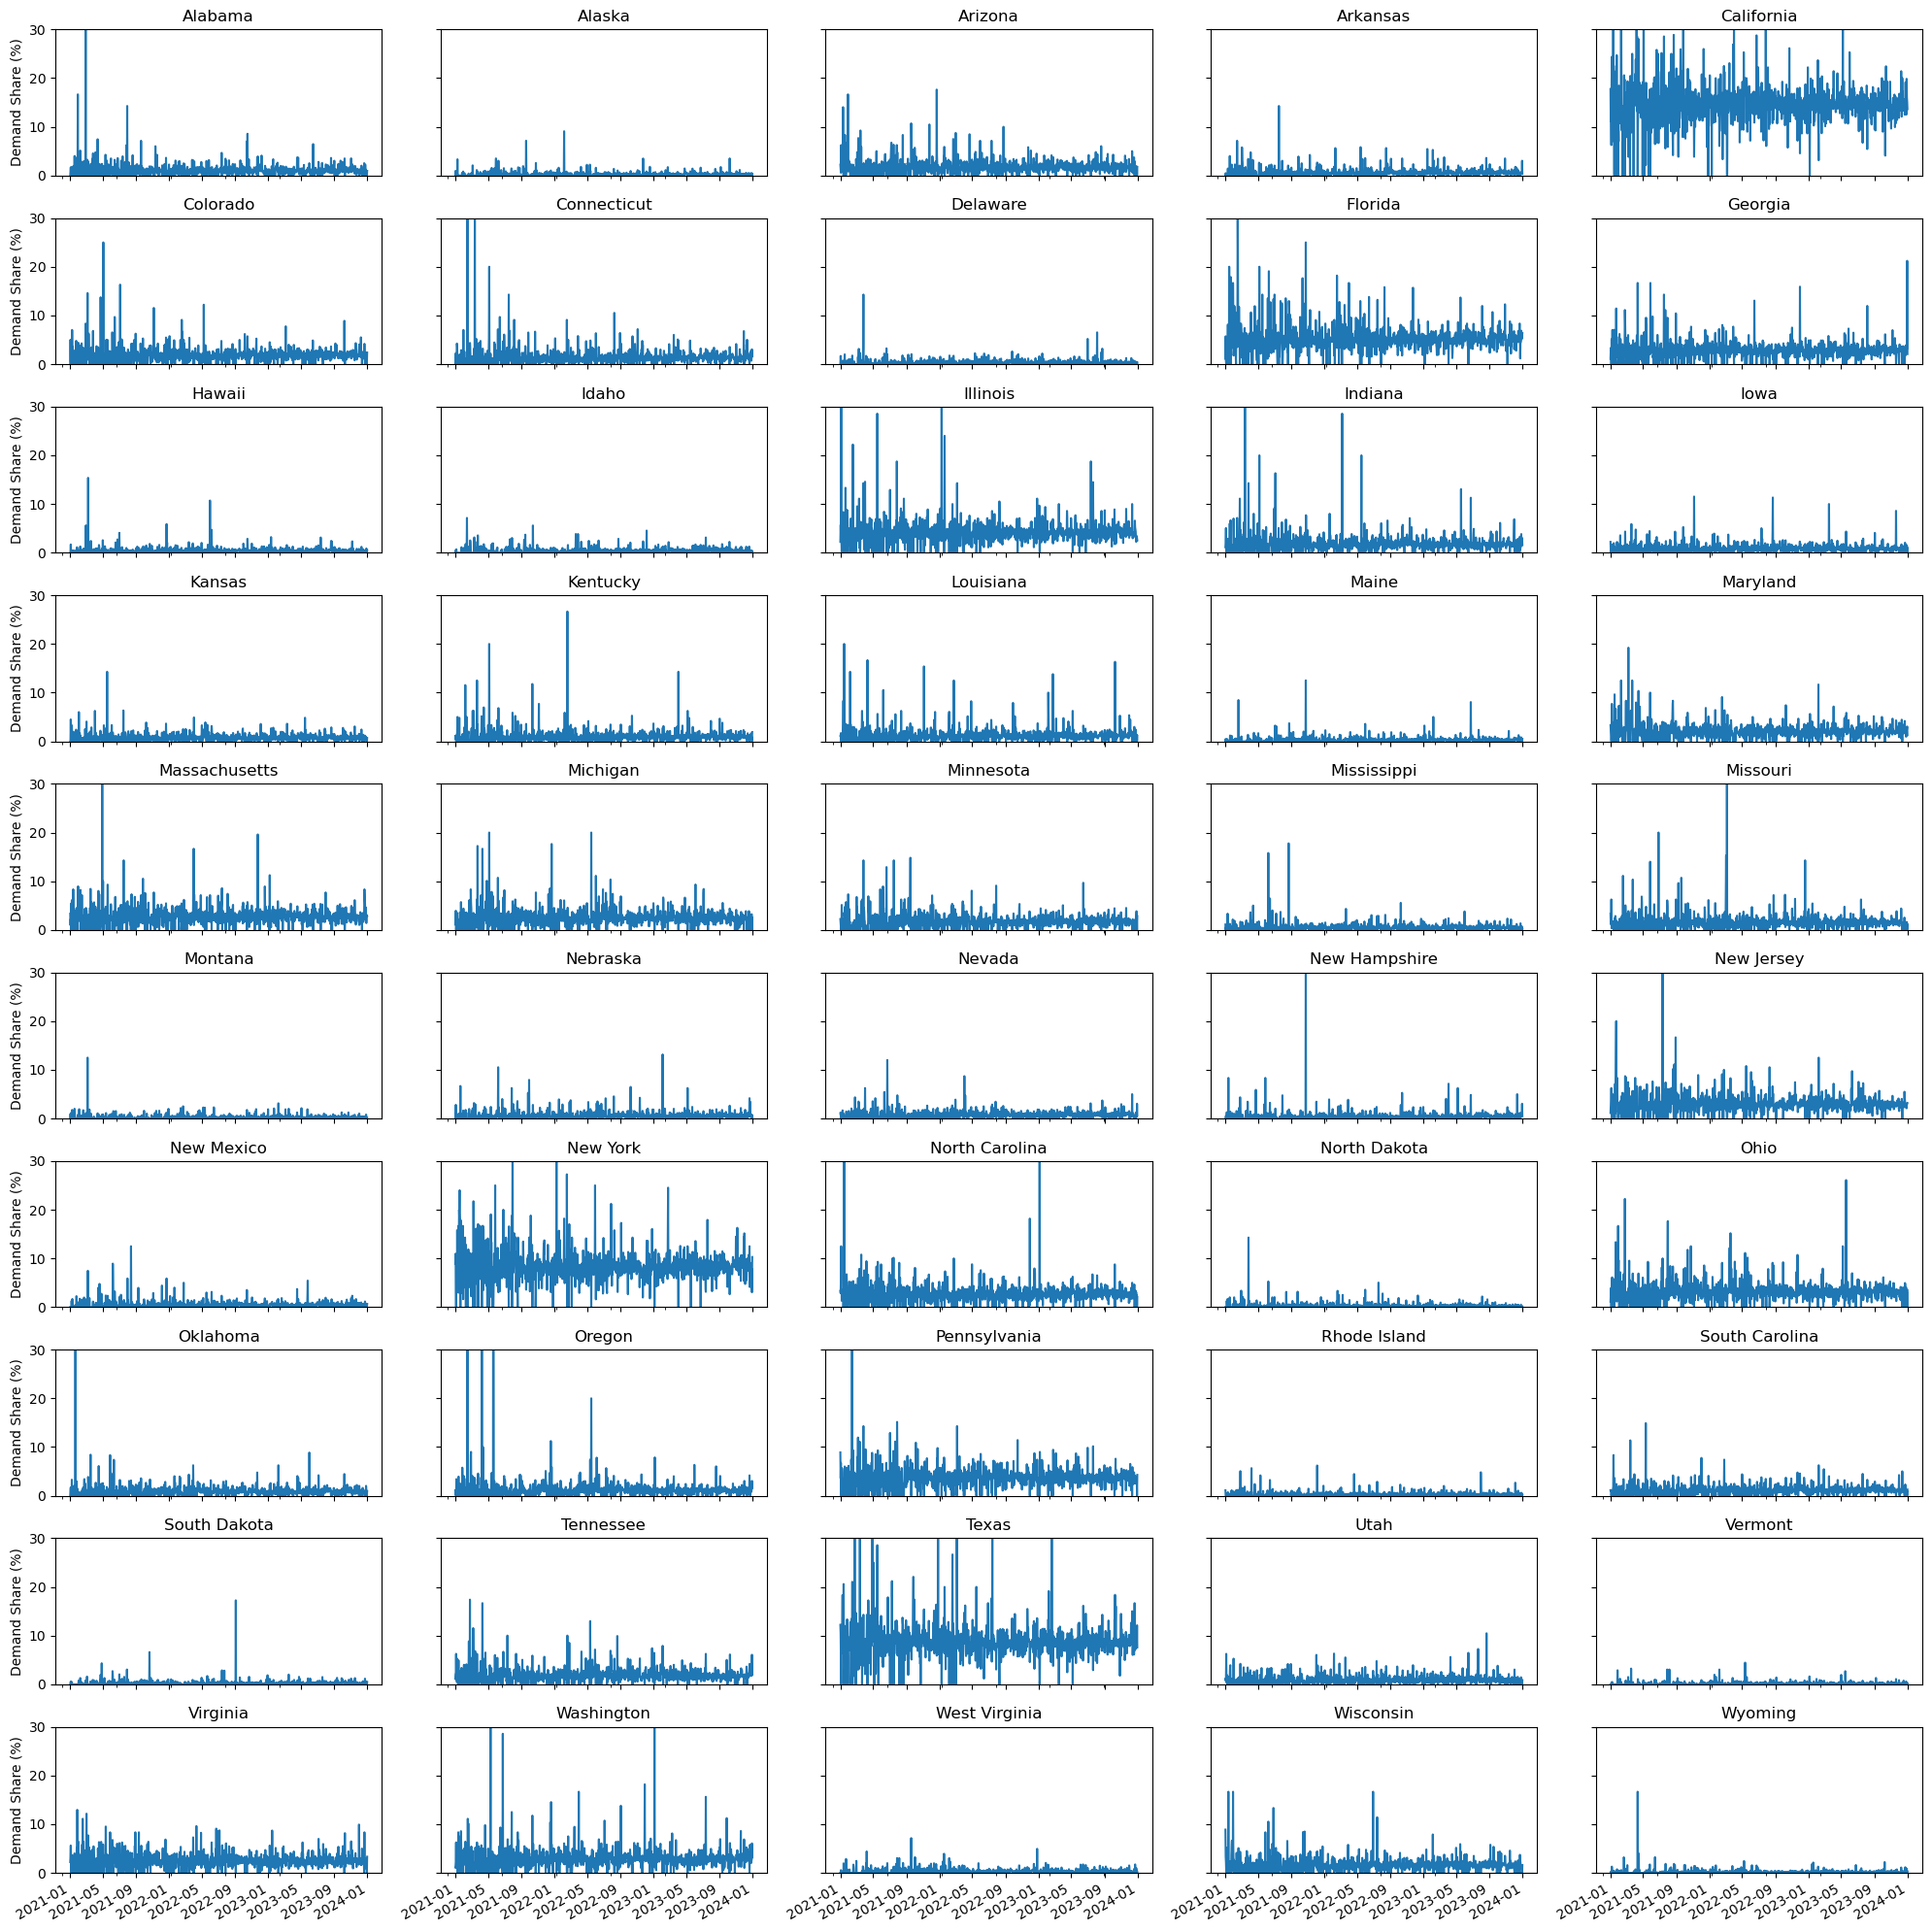

In [52]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

for i, state in enumerate(pivot_state_demand_share.columns):
    pivot_state_demand_share[state].plot(ax=axes[i], title=state)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Demand Share (%)')
    axes[i].set_ylim(0, 30)

plt.tight_layout()
plt.show()

These graphs are zoomed in from 0-30% on the y-axis. None seem to particularly stand out in demand share growth.

Show yearly (quarterly) averages as a table? Show percentage change?

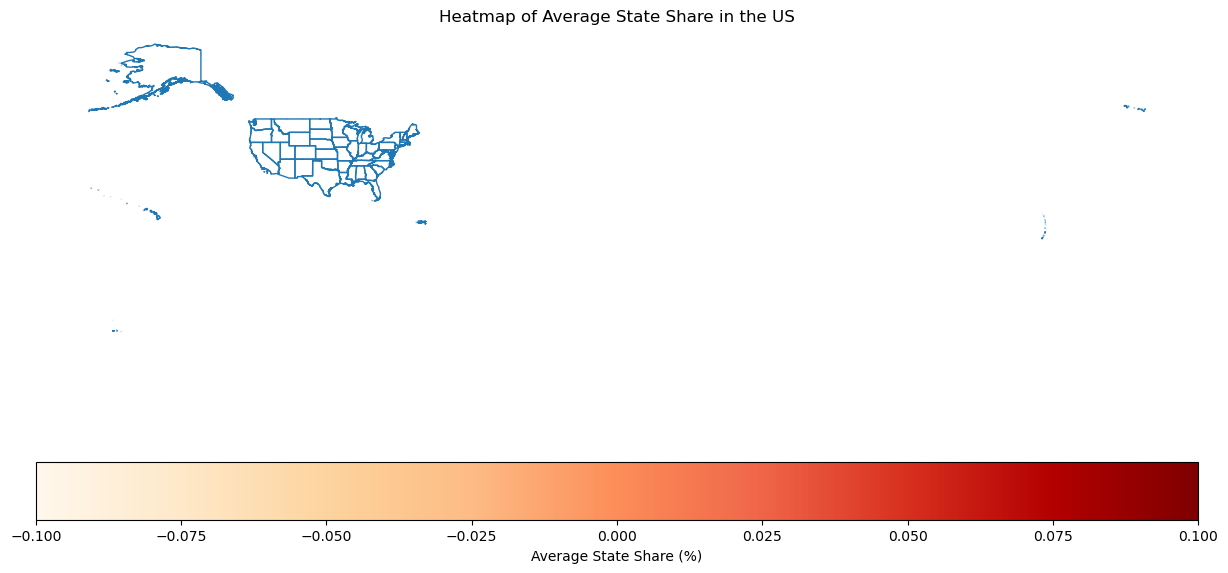

In [35]:
# Merge the average state share with the states GeoDataFrame
states['average_share'] = states['STUSPS'].map(average_state_share)

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
states.boundary.plot(ax=ax, linewidth=1)
states.plot(column='average_share', ax=ax, legend=True,
            legend_kwds={'label': "Average State Share (%)",
                         'orientation': "horizontal"},
            cmap='OrRd')

# Set the title
ax.set_title('Heatmap of Average State Share in the US')

# Remove axis for better visualization
ax.set_axis_off()

plt.show()

In [34]:
# Calculate the average share for each state from pivot_state_demand_share
average_state_share = pivot_state_demand_share.mean()

# Display the average share for each state
average_state_share

State
Alabama            1.101864
Alaska             0.243392
Arizona            1.788132
Arkansas           0.618772
California        14.607095
Colorado           1.884339
Connecticut        1.471598
Delaware           0.372898
Florida            5.237364
Georgia            2.843000
Hawaii             0.422487
Idaho              0.383430
Illinois           4.210599
Indiana            1.905841
Iowa               0.876579
Kansas             0.774585
Kentucky           1.069415
Louisiana          1.268720
Maine              0.303864
Maryland           2.041946
Massachusetts      2.801346
Michigan           2.502033
Minnesota          1.754945
Mississippi        0.545747
Missouri           1.599591
Montana            0.255068
Nebraska           0.637741
Nevada             0.777336
New Hampshire      0.476340
New Jersey         3.013663
New Mexico         0.509291
New York           8.308217
North Carolina     2.779996
North Dakota       0.271194
Ohio               3.169945
Oklahoma      

In [17]:
# Resample the pivot table to quarterly frequency and calculate the mean for each state
yearly_average_state_shares = pivot_state_demand_share.resample('YE').mean()

# Display the quarterly averages
yearly_average_state_shares

State           Alabama    Alaska   Arizona  Arkansas  California  Colorado  \
demandRequest                                                                 
2021-12-31     1.218256  0.227975  1.780983  0.571851   14.407686  1.943325   
2022-12-31     1.050781  0.258715  1.798182  0.599834   14.707131  1.844897   
2023-12-31     1.037194  0.243400  1.785192  0.684375   14.705375  1.865119   

State          Connecticut  Delaware   Florida   Georgia  ...  South Dakota  \
demandRequest                                             ...                 
2021-12-31        1.616257  0.355080  5.270714  2.803227  ...      0.226571   
2022-12-31        1.410152  0.374553  5.303947  2.849872  ...      0.265147   
2023-12-31        1.389178  0.388964  5.137614  2.875683  ...      0.255816   

State          Tennessee     Texas      Utah   Vermont  Virginia  Washington  \
demandRequest                                                                  
2021-12-31      1.842683  9.067207  0.841319  0.124703  2.524406    2.826926   
2022-12-31      1.958069  8.789878  0.921516  0.169789  2.521281    2.982168   
2023-12-31      1.864740  8.668715  0.976541  0.173958  2.601533    3.024238   

State          West Virginia  Wisconsin   Wyoming  
demandRequest                                      
2021-12-31          0.362359   1.694097  0.231104  
2022-12-31          0.337334   1.644425  0.166139  
2023-12-31          0.345466   1.655348  0.192654  

[3 rows x 50 columns]

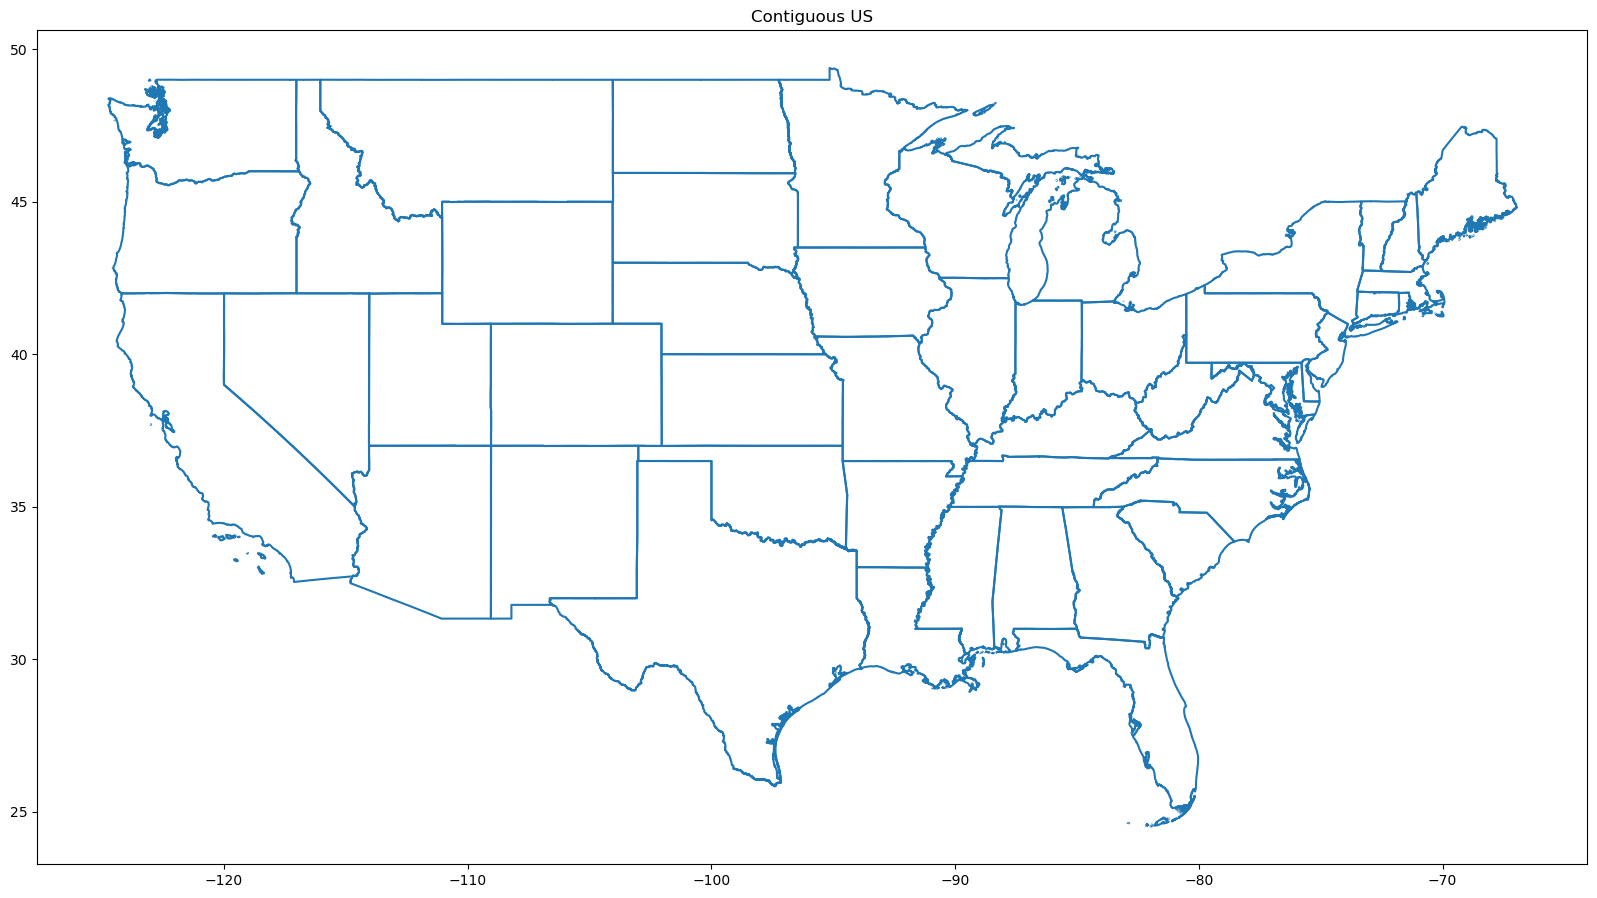

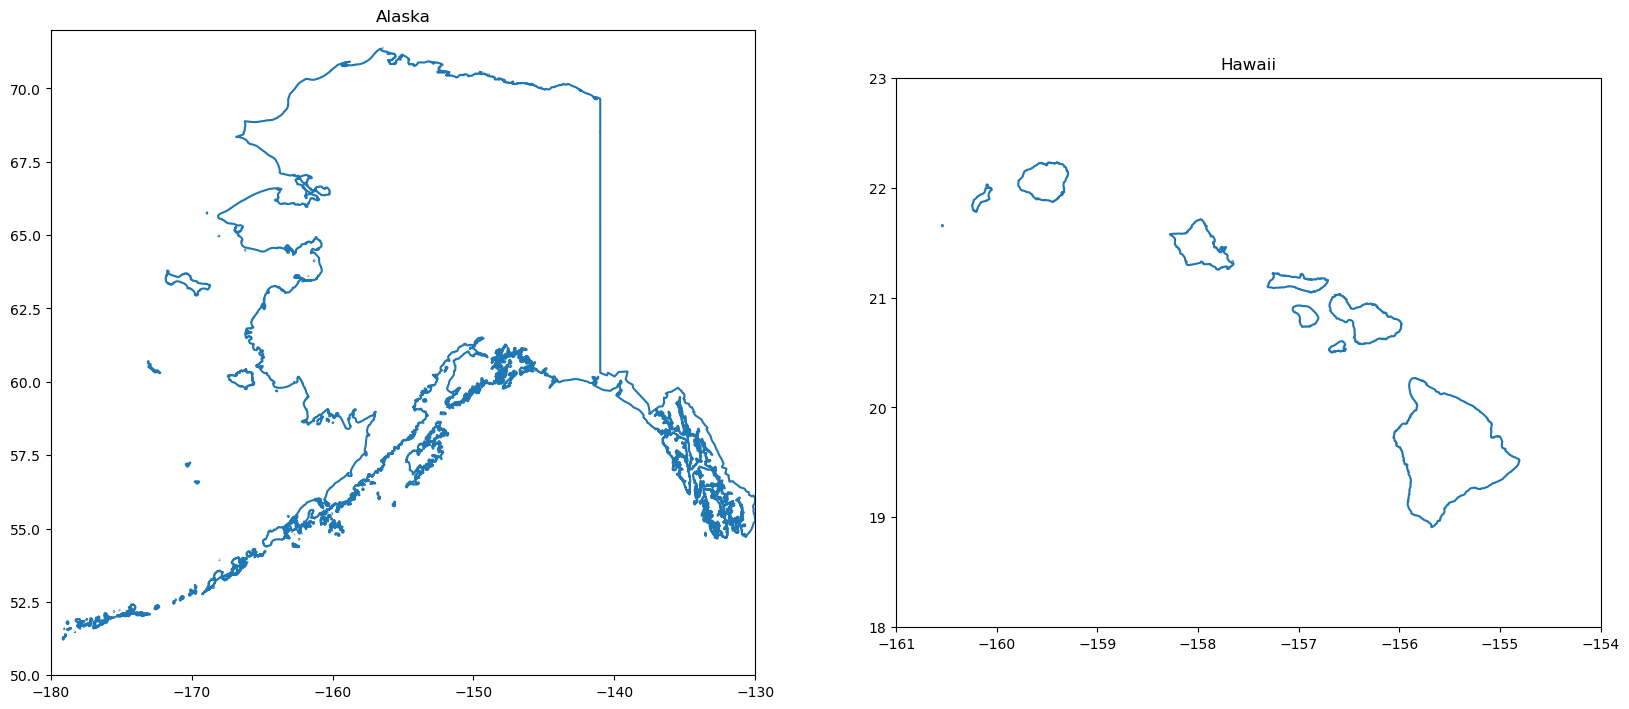

In [32]:
states = gpd.read_file('cb_2023_us_state_500k.shp')



states_to_plot = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'DC', 'VI', 'GU', 'AS', 'MP'])]

# Filter out Alaska and Hawaii for separate subplots
alaska = states[states['STUSPS'] == 'AK']
hawaii = states[states['STUSPS'] == 'HI']

fig, ax0 = plt.subplots(figsize=(20, 15))

fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the contiguous US states
states_to_plot.boundary.plot(ax=ax0)
ax0.set_title('Contiguous US')

# Plot Alaska with adjusted x and y limits to focus on the main state portion
alaska.boundary.plot(ax=ax2)
ax2.set_title('Alaska')
ax2.set_xlim(-180, -130)
ax2.set_ylim(50, 72)

# Plot Hawaii with adjusted x and y limits to focus on the main state portion
hawaii.boundary.plot(ax=ax1)
ax1.set_title('Hawaii')
ax1.set_xlim(-161, -154)
ax1.set_ylim(18, 23)

plt.show()

# Task 5

In [92]:
df_delivery_costs_and_times = pd.read_excel('FruitSoul Expected Delivery Costs and Times.xlsx')

Add acceptable shipping date columns. Make sure they do not land on holidays or Sundays.

In [94]:
# Add shipping date columns
# Merge df_demand_log with df_delivery_costs_and_times to get the delivery times for each state
df_merged = df_demand_log.merge(df_delivery_costs_and_times, left_on='State', right_on='Destination State')

# Calculate the new shipping dates
df_merged['earliestShipping'] = df_merged['earliestDelivery'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['preferredShipping'] = df_merged['preferredDelivery'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')
df_merged['latestShipping'] = df_merged['latestDelivery'] - pd.to_timedelta(df_merged['Expected                     Delivery Time     From Stone Mountain (days)'], unit='d')

# If the shipping date columns are not already datetime, also ensure they are converted
df_merged['earliestShipping'] = pd.to_datetime(df_merged['earliestShipping'])
df_merged['preferredShipping'] = pd.to_datetime(df_merged['preferredShipping'])
df_merged['latestShipping'] = pd.to_datetime(df_merged['latestShipping'])

# Function to check if a date is Labor Day
def is_labor_day(date):
    if date.strftime('%m') == '09' and date.strftime('%d') <= '07' and date.weekday() == 0:
        return True
    return False

# Define the date for the 4th of July 
july_4th = '07-04'

# Function to adjust dates for earliest or latest shipping dates on Sundays, labor days, or 4th of July
def adjust_date(date, type='e'):
    """
    Adjust the date based on the type:
    'e' for Earliest Acceptable Shipping Date,
    'l' for Latest Acceptable Shipping Date
    """
    if type == 'e':
        if date.weekday() == 6:
            date = date + pd.Timedelta(days=1)
        if is_labor_day(date) or date.strftime('%m-%d') == july_4th:
            date = date + pd.Timedelta(days=1)
            if date.weekday() == 6:
                date = date + pd.Timedelta(days=1)
        return date
    
    if type == 'l':
        if is_labor_day(date) or date.strftime('%m-%d') == july_4th:
            date = date - pd.Timedelta(days=1)
        if date.weekday() == 6:
            date = date - pd.Timedelta(days=1)
            if is_labor_day(date) or date.strftime('%m-%d') == july_4th:
                date = date - pd.Timedelta(days=1)
        return date

    return date

# Adjust the dates
df_merged['earliestShipping'] = df_merged['earliestShipping'].apply(lambda x: adjust_date(x, 'e'))
df_merged['latestShipping'] = df_merged['latestShipping'].apply(lambda x: adjust_date(x, 'l'))

# Adjust Preferred Shipping Date to earliest or latest if it is before or after the acceptable range
df_merged['preferredShipping'] = df_merged.apply(
    lambda row: row['earliestShipping'] if row['preferredShipping'] < row['earliestShipping'] else (
        row['latestShipping'] if row['preferredShipping'] > row['latestShipping'] else row['preferredShipping']
    ), axis=1
)

# Function to check if a date is a Sunday, Labor Day, or the 4th of July
def is_special_day(date):
    return date.weekday() == 6 or is_labor_day(date) or date.strftime('%m-%d') == july_4th

# Function to move the date forward by one day if it is a special day
def adjust_preferred_shipping_date(date):
    if is_special_day(date):
        date += pd.Timedelta(days=1)
        if is_special_day(date):
            date -= pd.Timedelta(days=2)
    return date

# Apply the function to the Preferred Shipping Date column
df_merged['preferredShipping'] = df_merged['preferredShipping'].apply(adjust_preferred_shipping_date)

Due to holidays, some demand is no longer feasible (shown below).

In [95]:
# Find the indexes where the 'Earliest Acceptable Shipping Date' is later than the 'Latest Acceptable Shipping Date'
invalid_shipping_dates = df_merged[df_merged['earliestShipping'] > df_merged['latestShipping']].index

# Display the count of such indexes
invalid_shipping_dates_count = len(invalid_shipping_dates)
print(f"Number of indexes with invalid shipping dates: {invalid_shipping_dates_count}")

Number of indexes with invalid shipping dates: 7273


This code double checks all holidays have been avoided.

In [96]:
# Dates for Labor Days
labor_days = ['2021-09-06', '2022-09-05', '2023-09-04']

# Filter the dataframe for entries where any of the shipping dates fall on Labor Days
labor_day_orders = df_merged[
    (df_merged['earliestShipping'].dt.strftime('%Y-%m-%d').isin(labor_days)) |
    (df_merged['preferredShipping'].dt.strftime('%Y-%m-%d').isin(labor_days)) |
    (df_merged['latestShipping'].dt.strftime('%Y-%m-%d').isin(labor_days))
]

# Display the count of such entries
labor_day_orders_count = labor_day_orders.shape[0]
print(f"Number of orders with shipping dates on Labor Days: {labor_day_orders_count}")

# Filter the dataframe for entries where any of the shipping dates fall on a Sunday
sunday_orders = df_merged[
    (df_merged['earliestShipping'].dt.weekday == 6) |
    (df_merged['preferredShipping'].dt.weekday == 6) |
    (df_merged['latestShipping'].dt.weekday == 6)
]

# Display the count of such entries
sunday_orders_count = sunday_orders.shape[0]
print(f"Number of orders with shipping dates on Sundays: {sunday_orders_count}")

# Filter the dataframe for entries where any of the shipping dates fall on the 4th of July
july_4th_orders = df_merged[
    (df_merged['earliestShipping'].dt.strftime('%m-%d') == july_4th) |
    (df_merged['preferredShipping'].dt.strftime('%m-%d') == july_4th) |
    (df_merged['latestShipping'].dt.strftime('%m-%d') == july_4th)
]

# Display the count of such entries
july_4th_orders_count = july_4th_orders.shape[0]
print(f"Number of orders with shipping dates on the 4th of July: {july_4th_orders_count}")

Number of orders with shipping dates on Labor Days: 0
Number of orders with shipping dates on Sundays: 0
Number of orders with shipping dates on the 4th of July: 0


Merge acceptable shipping dates with df_demand_log.

In [118]:
# Drop the extra columns from the merge with main dataframe
df_demand_log = df_merged.drop(columns=['Destination State', 'Approximate distance from Stone Mountain (miles)', 'Expected Delivery Cost From Stone Mountain (USD/ounce)', 'Expected                     Delivery Time     From Stone Mountain (days)'])

Add minimal, preferred, and maximal order-to-ship dates.

In [119]:
# Calculate the order-to-ship times
df_demand_log['minOrderToShip'] = (df_demand_log['earliestShipping'] - df_demand_log['demandRequest']).dt.days
df_demand_log['preferredOrderToShip'] = (df_demand_log['preferredShipping'] - df_demand_log['demandRequest']).dt.days
df_demand_log['maxOrderToShip'] = (df_demand_log['latestShipping'] - df_demand_log['demandRequest']).dt.days

### Using a normal distribution to smooth demand.

In [34]:
# Function to compute demand probabilities based on a normal distribution
def demand_probability(row):
    preferred_date = row['preferredShipping']
    earliest_date = row['earliestShipping']
    latest_date = row['latestShipping']
    
    # Calculate the standard deviation (earliest/latest represent ±2 standard deviations)
    std_dev = (latest_date - earliest_date).days / 4
    
    # Ensure std_dev is at least 1 to avoid division by zero
    std_dev = max(std_dev, 1)
    
    # Initialize empty list for smoothed demand distribution
    demand_distribution = []
    
    # Compute cumulative probabilities for the range of acceptable shipping dates
    for day in pd.date_range(earliest_date, latest_date):
        # CDF at the start and end of the day
        cdf_start = norm.cdf((day - pd.Timedelta(days=0.5) - preferred_date).days, scale=std_dev)
        cdf_end = norm.cdf((day + pd.Timedelta(days=0.5) - preferred_date).days, scale=std_dev)
        
        # Cumulative probability for the 24-hour period (between start and end of the day)
        daily_probability = cdf_end - cdf_start
        
        demand_distribution.append({
            'Date': day,
            'Mix': row['Mix'],
            'Probability': daily_probability
        })
    
    # Convert list to DataFrame
    df_demand_distribution = pd.DataFrame(demand_distribution)

    if len(df_demand_distribution) == 0:
        return pd.DataFrame(columns=['Date', 'Mix', 'Smoothed Daily Demand'])
    
    # Normalize probabilities to sum up to 1, then scale to match total quantity
    total_probability = df_demand_distribution['Probability'].sum()
    df_demand_distribution['Smoothed Daily Demand'] = (df_demand_distribution['Probability'] / total_probability) * row['Quantity']
    
    return df_demand_distribution[['Date', 'Mix', 'Smoothed Daily Demand']]

Note: the code below take a long time to run.

In [35]:
# Apply the function to each row in the demand log and concatenate the results
smoothed_demand_history = pd.concat([demand_probability(row) for _, row in df_demand_log.iterrows()])

# Aggregate smoothed demand over date ranges
final_smoothed_demand_history = smoothed_demand_history.groupby(['Date', 'Mix']).agg({'Smoothed Daily Demand': 'sum'}).reset_index()

C:\Users\natej\AppData\Local\Temp\ipykernel_22136\114796216.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  smoothed_demand_history = pd.concat([demand_probability(row) for _, row in df_demand_log.iterrows()])


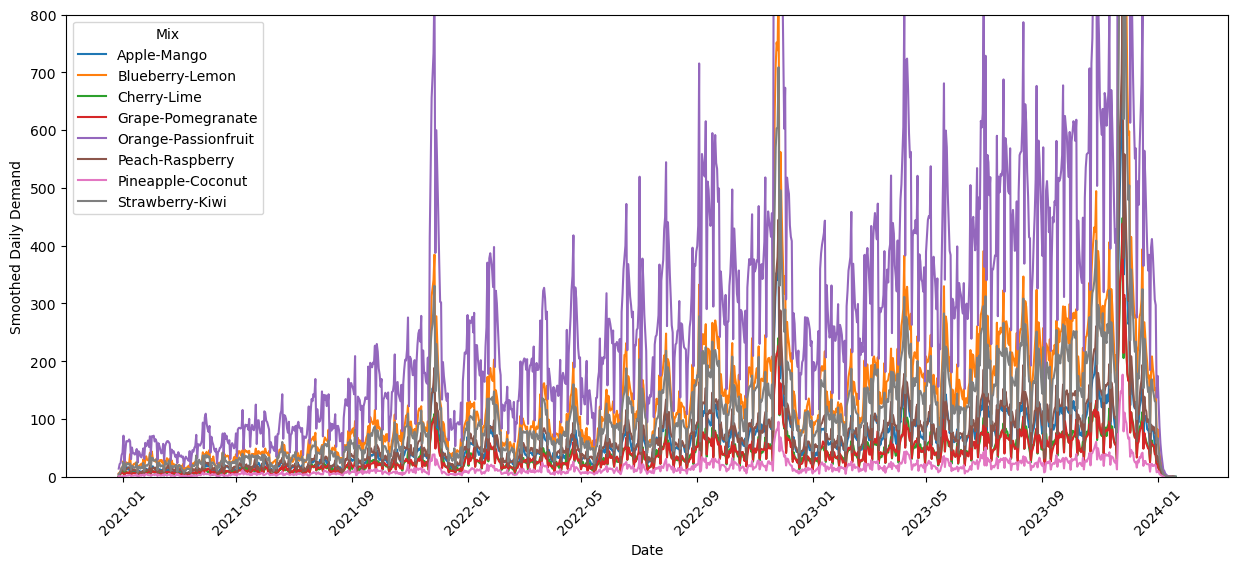

In [36]:
# Group by Mix and plot the smoothed daily demand over time
plt.figure(figsize=(15, 6))
for mix, group in final_smoothed_demand_history.groupby('Mix'):
    plt.plot(group['Date'], group['Smoothed Daily Demand'], label=mix)

plt.xlabel('Date')
plt.ylabel('Smoothed Daily Demand')
plt.legend(title='Mix', loc='upper left')
plt.xticks(rotation=45)
plt.ylim(0, 800)

# Display the plot
plt.show()

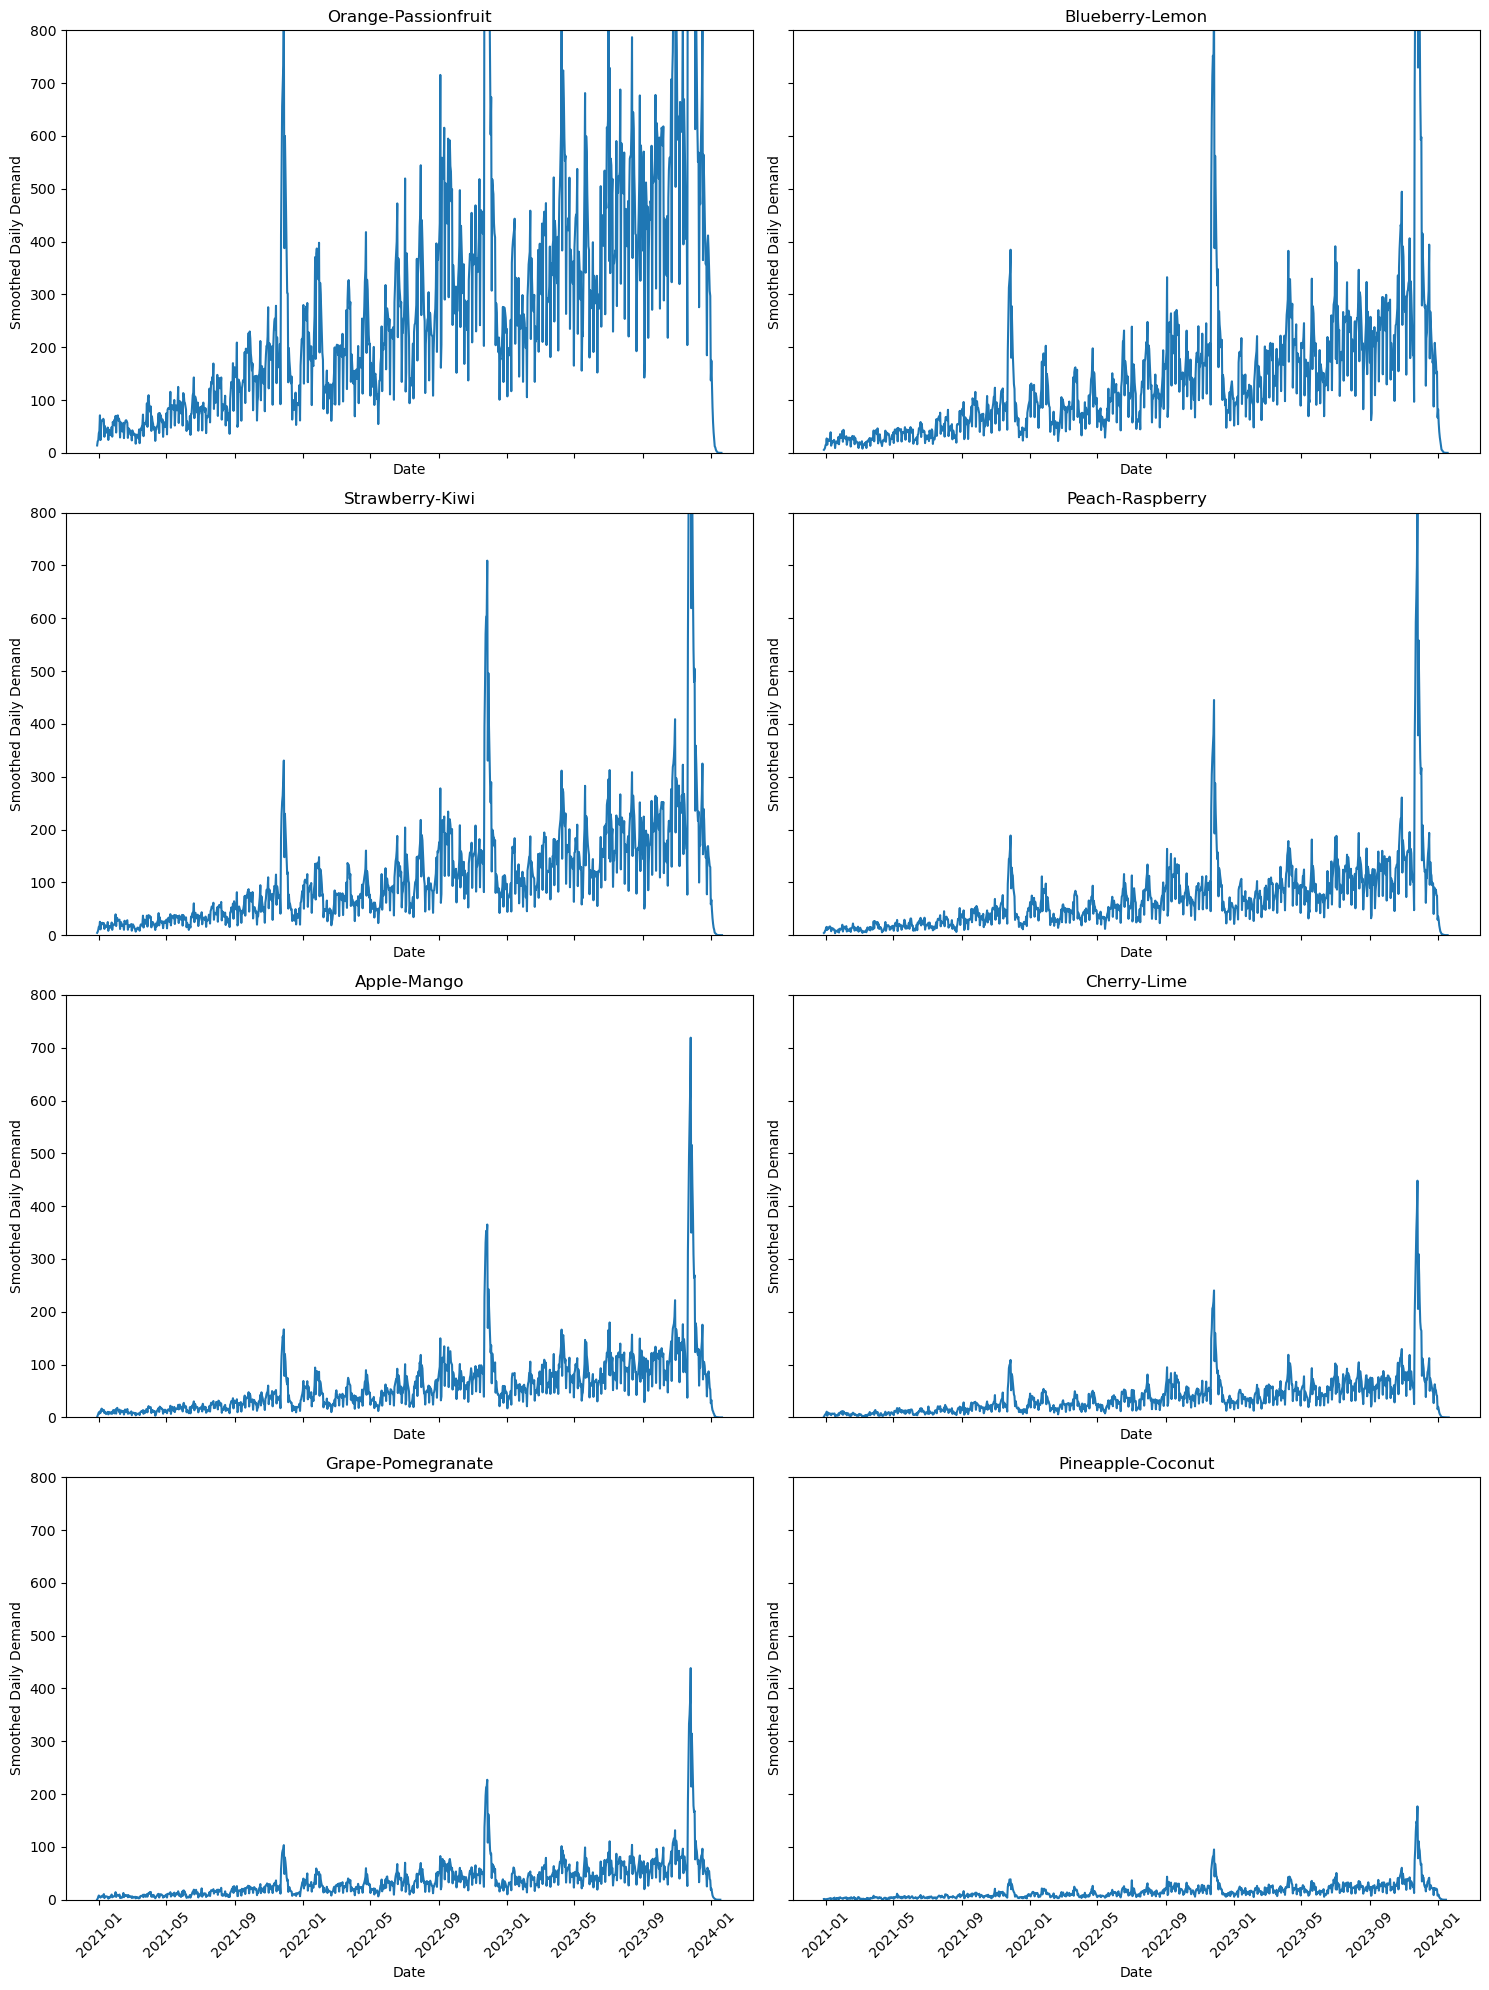

In [37]:
# Get the top 8 mixes by total smoothed daily demand
smoothed_8_mixes = final_smoothed_demand_history.groupby('Mix')['Smoothed Daily Demand'].sum().nlargest(8).index

# Filter the dataframe for only the top 8 mixes
data = final_smoothed_demand_history[final_smoothed_demand_history['Mix'].isin(smoothed_8_mixes)]

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each mix in a separate subplot
for i, mix in enumerate(smoothed_8_mixes):
    mix_data = data[data['Mix'] == mix]
    axes[i].plot(mix_data['Date'], mix_data['Smoothed Daily Demand'])
    axes[i].set_title(mix)
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Smoothed Daily Demand')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 800)  # Set y-axis range

# Adjust layout
plt.tight_layout()
plt.show()

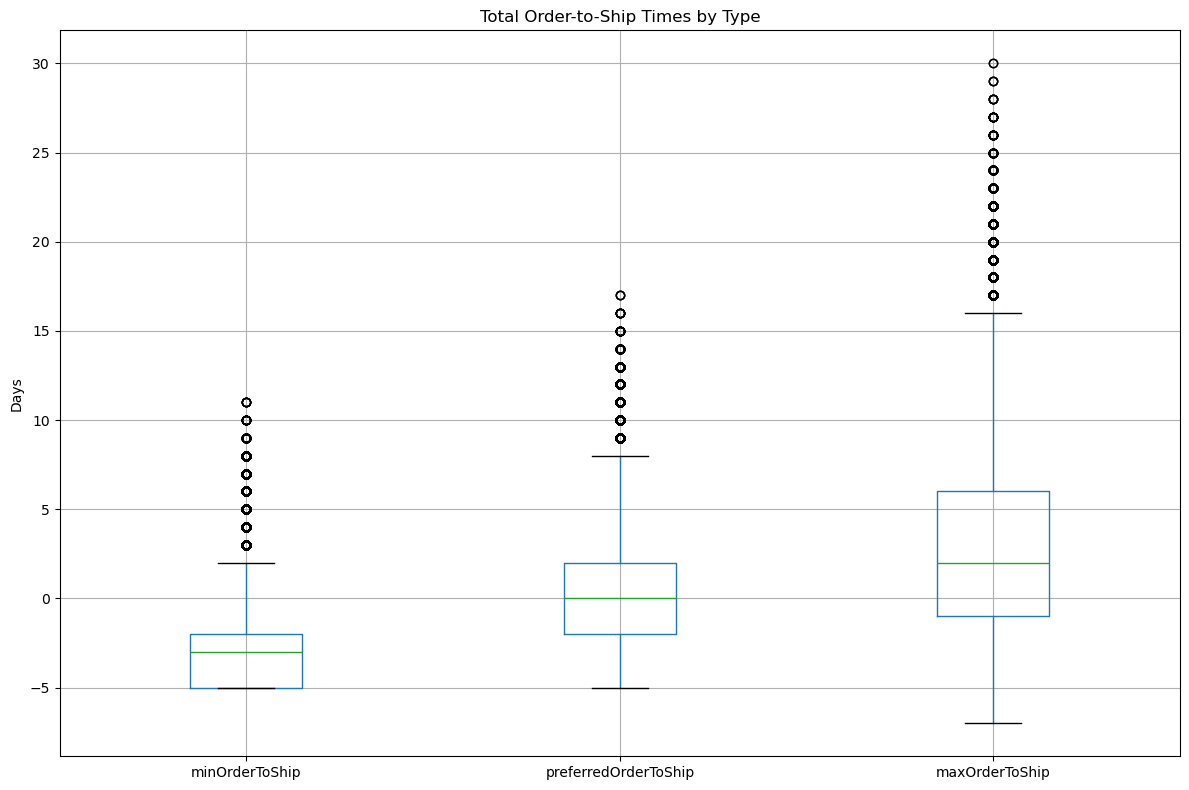

In [38]:
# Creating a boxplot for each of the specified columns in df_demand_log
plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each of the specified columns
df_demand_log.boxplot(column=['minOrderToShip', 'preferredOrderToShip', 'maxOrderToShip'])

plt.title('Total Order-to-Ship Times by Type')
#plt.xlabel('Order-to-Ship Time Type')
plt.ylabel('Days')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

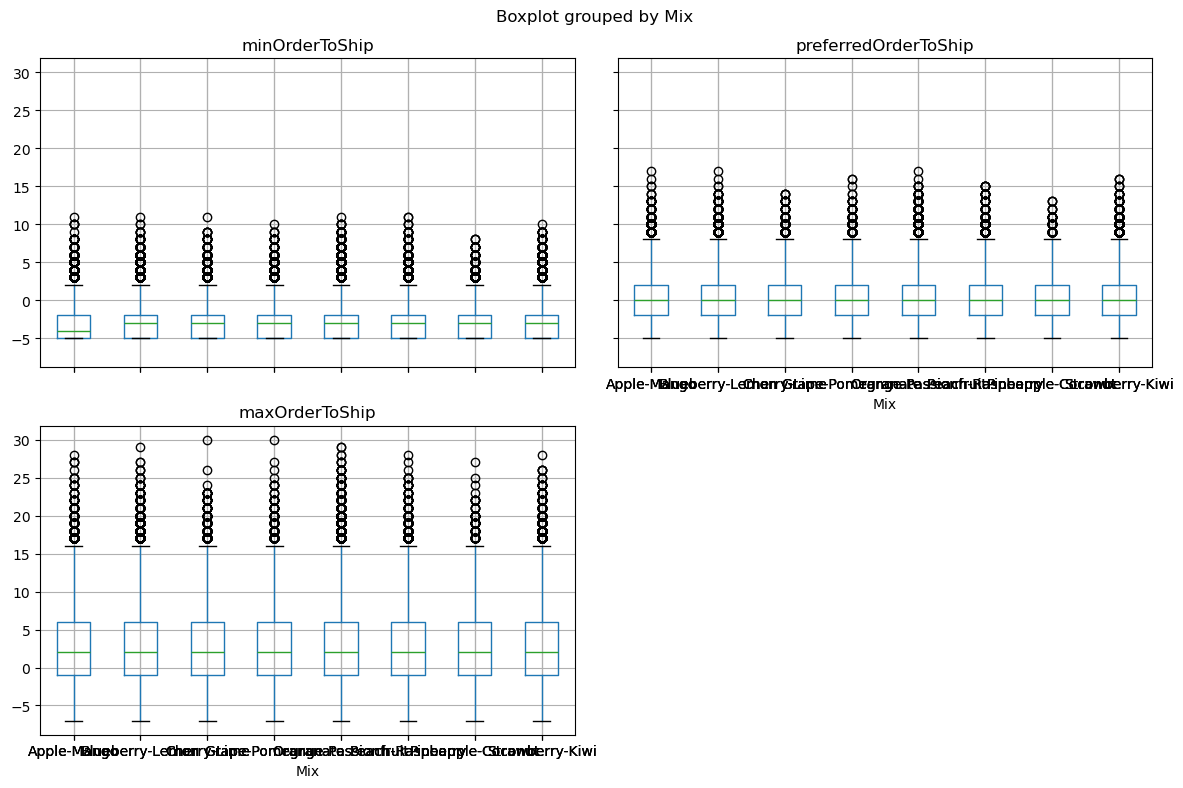

In [39]:

# Creating a boxplot for each Mix across the three specified columns
columns = ['minOrderToShip', 'preferredOrderToShip', 'maxOrderToShip']

plt.figure(figsize=(12, 8))

# Plot a box and whisker plot for each mix and each of the specified columns
df_demand_log.boxplot(column=columns, by='Mix', figsize=(12, 8))

plt.title(' Order-to-Ship Times by Mix')

plt.ylabel('Order-to-Ship Time')
plt.xlabel('Mix')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

After evaluating the demand of different product mixes a few things stand out:
First, the demand cycles do not appear consistent on a yearly basis, aside from a reliable spike in early December. The second is the demand for each product mix has grown since 2021, and with this increase in volume of demand comes an increase in the volatility of demand. Third, ship estimates are similar across all products, it does not appear certain product mixes follow different shipping patterns/timelines.

# Task 6

# Task 7

# Task 8

In [ ]:
# Ensure achievable_demand_temp is defined
achievable_demand_temp = achievable_demand.copy()
achievable_demand_temp.insert(achievable_demand_temp.columns.get_loc('Quantity') + 1, 'ozOfProduct', achievable_demand_temp['jarSize'] * achievable_demand_temp['Quantity'])

# Create a pivot table indexed by preferredShipping date with columns Quantity and ozOfProduct
pivot_preferred_shipping = achievable_demand_temp.pivot_table(
    index='preferredShipping',
    values=['Quantity'],
    aggfunc='sum'
)

In [149]:
achievable_demand_temp

DemandID demandRequest                  Mix  jarSize       State  \
0              1    2021-01-01          Apple-Mango        8    Maryland   
1              2    2021-01-01      Blueberry-Lemon       32    Kentucky   
2              3    2021-01-01  Orange-Passionfruit       16   Minnesota   
3              4    2021-01-01  Orange-Passionfruit       16  California   
4              5    2021-01-01  Orange-Passionfruit       32   Louisiana   
...          ...           ...                  ...      ...         ...   
835369    835370    2023-12-31          Apple-Mango       32    Kentucky   
835370    835371    2023-12-31      Strawberry-Kiwi       32     Indiana   
835371    835372    2023-12-31      Blueberry-Lemon       32    New York   
835373    835374    2023-12-31      Peach-Raspberry       16    New York   
835374    835375    2023-12-31  Orange-Passionfruit       32     Arizona   

        Quantity  ozOfProduct earliestDelivery preferredDelivery  \
0              1            8       2021-01-01        2021-01-04   
1              1           32       2021-01-04        2021-01-06   
2              1           16       2021-01-07        2021-01-10   
3              1           16       2021-01-07        2021-01-11   
4              1           32       2021-01-01        2021-01-04   
...          ...          ...              ...               ...   
835369         1           32       2023-12-31        2024-01-04   
835370         1           32       2023-12-31        2024-01-05   
835371         1           32       2023-12-31        2024-01-07   
835373         1           16       2024-01-03        2024-01-03   
835374         1           32       2023-12-31        2024-01-05   

       latestDelivery earliestShipping preferredShipping latestShipping  \
0          2021-01-07       2020-12-28        2020-12-30     2021-01-02   
1          2021-01-09       2021-01-01        2021-01-04     2021-01-06   
2          2021-01-11       2021-01-02        2021-01-05     2021-01-06   
3          2021-01-14       2021-01-02        2021-01-06     2021-01-09   
4          2021-01-10       2020-12-28        2020-12-31     2021-01-06   
...               ...              ...               ...            ...   
835369     2024-01-04       2023-12-28        2024-01-01     2024-01-01   
835370     2024-01-05       2023-12-28        2024-01-02     2024-01-02   
835371     2024-01-07       2023-12-26        2024-01-02     2024-01-02   
835373     2024-01-09       2023-12-29        2023-12-29     2024-01-04   
835374     2024-01-13       2023-12-26        2024-01-01     2024-01-08   

        minOrderToShip  preferredOrderToShip  maxOrderToShip  
0                   -4                    -2               1  
1                    0                     3               5  
2                    1                     4               5  
3                    1                     5               8  
4                   -4                    -1               5  
...                ...                   ...             ...  
835369              -3                     1               1  
835370              -3                     2               2  
835371              -5                     2               2  
835373              -2                    -2               4  
835374              -5                     1               8  

[614063 rows x 16 columns]

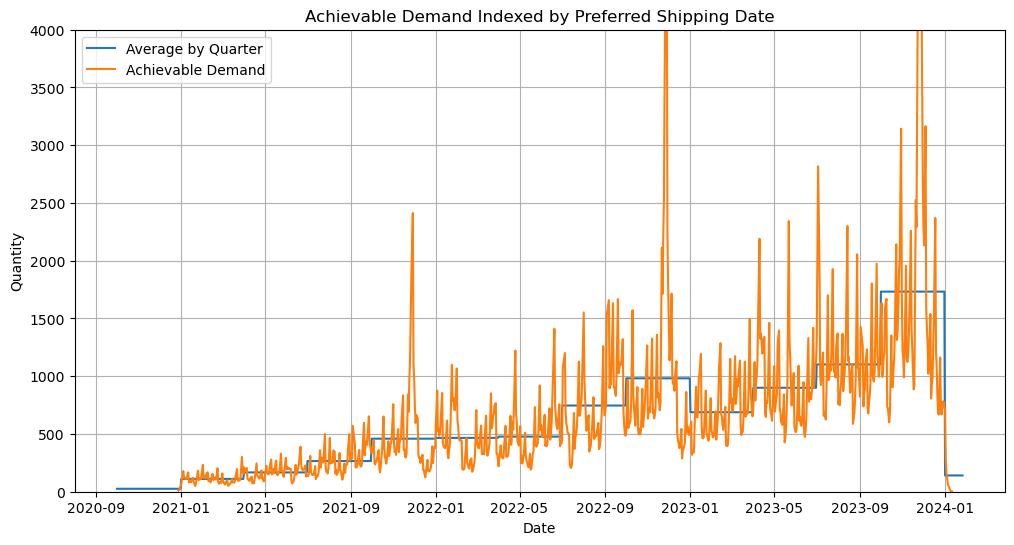

In [151]:
# Resample the pivot_preferred_shipping to monthly frequency and calculate the mean
quarterly_average_preferred_shipping = pivot_preferred_shipping.resample('YE').mean()

# Refine average quantity by quarter to make a proper line plot
for i in quarterly_average_preferred_shipping.index:
    three_months_prior = (i - pd.DateOffset(months=2)).month
    year_month = pd.to_datetime(f'{i.year}-{three_months_prior}-01')
    new_row = pd.DataFrame({'Quantity': [quarterly_average_preferred_shipping.loc[i, 'Quantity']]}, index=[year_month])
    quarterly_average_preferred_shipping = pd.concat([quarterly_average_preferred_shipping, new_row]).sort_index()

quarterly_average_preferred_shipping.index = quarterly_average_preferred_shipping.index[:-1].append(pd.to_datetime([last_day]))

plt.figure(figsize=(12, 6))

plt.plot(quarterly_average_preferred_shipping.index, quarterly_average_preferred_shipping['Quantity'], label='Average by Quarter')

# Plot achievable demand indexed by preferred shipping date with quantity
plt.plot(pivot_preferred_shipping.index, pivot_preferred_shipping['Quantity'], label='Achievable Demand')

plt.title('Achievable Demand Indexed by Preferred Shipping Date')
plt.xlabel('Date')
plt.ylabel('Quantity')

plt.ylim(0, 4000)

plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Reindex achievable_demand_temp by preferred shipping date
achievable_demand_temp.set_index('preferredShipping', inplace=True)

In [158]:
# Sort achievable_demand_temp by preferredShipping, then by maxOrderToShip
achievable_demand_temp = achievable_demand_temp.sort_values(by=['preferredShipping', 'maxOrderToShip'])
achievable_demand_temp

DemandID demandRequest                  Mix  jarSize  \
preferredShipping                                                         
2020-12-28              436    2021-01-02  Orange-Passionfruit       16   
2020-12-28              386    2021-01-02  Orange-Passionfruit       32   
2020-12-28               67    2021-01-01  Orange-Passionfruit       32   
2020-12-28              112    2021-01-02      Blueberry-Lemon        8   
2020-12-28               51    2021-01-01    Pineapple-Coconut       32   
...                     ...           ...                  ...      ...   
2024-01-09           831896    2023-12-29          Apple-Mango       16   
2024-01-10           832321    2023-12-29  Orange-Passionfruit       32   
2024-01-10           831263    2023-12-28          Cherry-Lime        8   
2024-01-11           834048    2023-12-29  Orange-Passionfruit       32   
2024-01-11           834786    2023-12-31          Apple-Mango       16   

                          State  Quantity  ozOfProduct earliestDelivery  \
preferredShipping                                                         
2020-12-28             New York         1           16       2021-01-02   
2020-12-28            Wisconsin         1           32       2021-01-02   
2020-12-28             New York         1           32       2021-01-01   
2020-12-28             New York         1            8       2021-01-02   
2020-12-28             New York         1           32       2021-01-01   
...                         ...       ...          ...              ...   
2024-01-09           California         1           16       2024-01-09   
2024-01-10         South Dakota         1           32       2024-01-06   
2024-01-10             Kentucky         1            8       2024-01-09   
2024-01-11              Alabama         1           32       2024-01-06   
2024-01-11              Alabama         1           16       2024-01-06   

                  preferredDelivery latestDelivery earliestShipping  \
preferredShipping                                                     
2020-12-28               2021-01-02     2021-01-08       2020-12-28   
2020-12-28               2021-01-02     2021-01-08       2020-12-28   
2020-12-28               2021-01-02     2021-01-06       2020-12-28   
2020-12-28               2021-01-02     2021-01-08       2020-12-28   
2020-12-28               2021-01-02     2021-01-07       2020-12-28   
...                             ...            ...              ...   
2024-01-09               2024-01-14     2024-01-26       2024-01-04   
2024-01-10               2024-01-12     2024-01-19       2024-01-04   
2024-01-10               2024-01-13     2024-01-23       2024-01-06   
2024-01-11               2024-01-12     2024-01-12       2024-01-05   
2024-01-11               2024-01-12     2024-01-14       2024-01-05   

                  latestShipping  minOrderToShip  preferredOrderToShip  \
preferredShipping                                                        
2020-12-28            2021-01-02              -5                    -5   
2020-12-28            2021-01-02              -5                    -5   
2020-12-28            2021-01-01              -4                    -4   
2020-12-28            2021-01-02              -5                    -5   
2020-12-28            2021-01-02              -4                    -4   
...                          ...             ...                   ...   
2024-01-09            2024-01-20               6                    11   
2024-01-10            2024-01-17               6                    12   
2024-01-10            2024-01-20               9                    13   
2024-01-11            2024-01-11               7                    13   
2024-01-11            2024-01-13               5                    11   

                   maxOrderToShip  
preferredShipping                  
2020-12-28                      0  
2020-12-28                      0  
2020-12-28                      0  


In [159]:
# Select only the columns maxOrderToShip, Quantity, and ozOfProduct from achievable_demand_temp
achievable_demand_temp = achievable_demand_temp[['maxOrderToShip', 'Quantity', 'ozOfProduct']]
achievable_demand_temp.head()

maxOrderToShip  Quantity  ozOfProduct
preferredShipping                                       
2020-12-28                      0         1           16
2020-12-28                      0         1           32
2020-12-28                      0         1           32
2020-12-28                      0         1            8
2020-12-28                      1         1           32

In [162]:
# Aggregate the quantity and ozOfProduct for each unique maxOrderToShip for each preferredShipping date
aggregated_data = achievable_demand_temp.groupby(['preferredShipping', 'maxOrderToShip']).agg({
    'Quantity': 'sum',
    'ozOfProduct': 'sum'
}).reset_index()

aggregated_data

preferredShipping  maxOrderToShip  Quantity  ozOfProduct
0            2020-12-28               0         4           88
1            2020-12-28               1         1           32
2            2020-12-28               2         1            8
3            2020-12-28               3         1           32
4            2020-12-28               7         2           40
...                 ...             ...       ...          ...
18265        2024-01-09              20         1            8
18266        2024-01-09              22         1           16
18267        2024-01-10              19         1           32
18268        2024-01-10              23         1            8
18269        2024-01-11              13         2           48

[18270 rows x 4 columns]

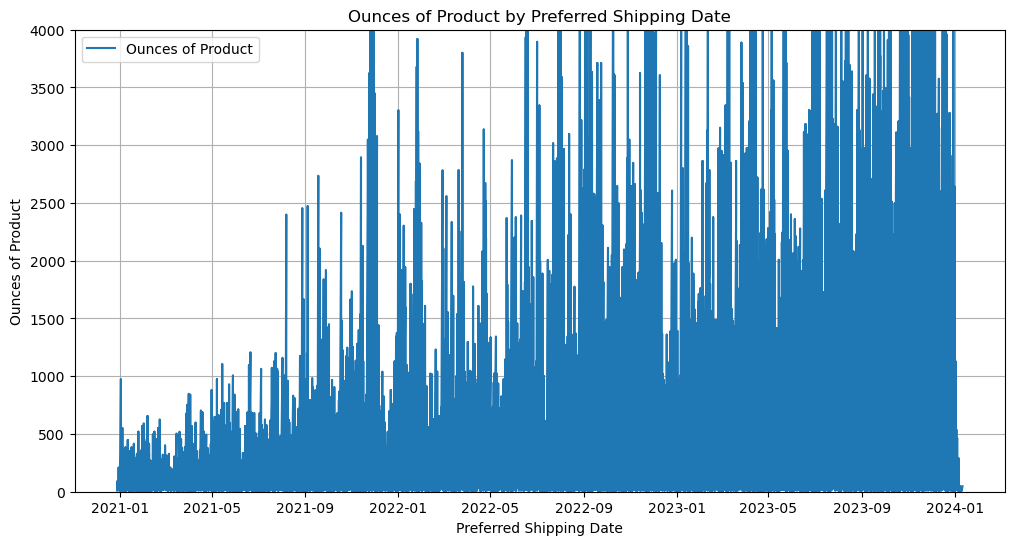

In [165]:
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['preferredShipping'], aggregated_data['ozOfProduct'], label='Ounces of Product')
plt.xlabel('Preferred Shipping Date')
plt.ylabel('Ounces of Product')
plt.ylim(0, 4000)
plt.title('Ounces of Product by Preferred Shipping Date')
plt.legend()
plt.grid(True)
plt.show()

# Task 9

# Task 10

Each tier of shelving would be 96in x 36in x 12in, with only enough room for one layer of each box to account for handling.

8oz jar cases are 13in x 10in. If they are stored with the long face on the long side of shelving, then 21 cases can fit on a shelf.

16oz jar cases are 15in x 10in. Either way, 18 cases can be stored on a shelf.

32oz jar cases are 17in x 13in. If the short face is on the long face of the shelving, then 14 cases can fit on a shelf.

In [11]:
num_of_8oz_cases = 200
num_of_16oz_cases = 100
num_of_32oz_cases = 50

def number_of_tiers_for_cases(num_cases, size):
    if size == 8:
        return math.ceil(num_cases / 21)
    if size == 16:
        return math.ceil(num_cases / 18)
    if size == 32:
        return math.ceil(num_cases / 15)
    return

print(f"Number of 8 oz jar tiers needed: {number_of_tiers_for_cases(num_of_8oz_cases, 8)}")
print(f"Number of 16 oz jar tiers needed: {number_of_tiers_for_cases(num_of_16oz_cases, 16)}")
print(f"Number of 32 oz jar tiers needed: {number_of_tiers_for_cases(num_of_32oz_cases, 32)}")

Number of 8 oz jar tiers needed: 10
Number of 16 oz jar tiers needed: 6
Number of 32 oz jar tiers needed: 4


# Task 11

Practice A) All finished bottles go to FPDC to be stored first, then FIFO from FPDC.

The benefit of this practice is the first product in will always be used first, so there is no product sitting for a long time. A downside is there is more double handling for each product. 

Practice B) If finished botteles are needed for packaging in next H hours (2-4 hours, currently), then go first to packaging. All else goes to FPDC to be stored and used with FIFO.

This allows for less double handling of product and, if the bottling and packaging centers are close, less empty-handed travel time on the way back from packaging. Making sure the rest of the product uses FIFO may not be a concern if product moves fast enough, but if not then there would more hands on managing. 

Maybe a mix of both would work. If there are many orders, then practice B could be utilized to save time, but when things are slow practice A could insure FIFO is being adhered to.

# Task 12

# Task 13

Mix containers are 12in x 12in, meaning a shelf 96in x 36in wide can hold up to 24 mix containers of a certain mix.

In [15]:
num_oz_apple_mango = 1500
num_oz_blackberry_pear = 500
num_oz_blueberry_lemon = 300
num_oz_cherry_lime = 2000
num_oz_grape_pomegranate = 1000
num_oz_orange_passionfruit = 15000
num_oz_peach_raspberry = 5000
num_oz_pineapple_coconut = 350
num_oz_strawberry_kiwi = 450

def number_of_tiers_for_oz(num_oz):
    gallons_needed = num_oz / 128
    containers_needed = gallons_needed / 3
    tiers_needed = containers_needed / 24
    return math.ceil(tiers_needed)

print(f"Number of tiers needed for {num_oz_apple_mango} oz of Apple Mango: {number_of_tiers_for_oz(num_oz_apple_mango)}")
print(f"Number of tiers needed for {num_oz_blackberry_pear} oz of Blackberry Pear: {number_of_tiers_for_oz(num_oz_blackberry_pear)}")
print(f"Number of tiers needed for {num_oz_blueberry_lemon} oz of Blueberry Lemon: {number_of_tiers_for_oz(num_oz_blueberry_lemon)}")
print(f"Number of tiers needed for {num_oz_cherry_lime} oz of Cherry Lime: {number_of_tiers_for_oz(num_oz_cherry_lime)}")
print(f"Number of tiers needed for {num_oz_grape_pomegranate} oz of Grape Pomegranate: {number_of_tiers_for_oz(num_oz_grape_pomegranate)}")
print(f"Number of tiers needed for {num_oz_orange_passionfruit} oz of Orange Passionfruit: {number_of_tiers_for_oz(num_oz_orange_passionfruit)}")
print(f"Number of tiers needed for {num_oz_peach_raspberry} oz of Peach Raspberry: {number_of_tiers_for_oz(num_oz_peach_raspberry)}")
print(f"Number of tiers needed for {num_oz_pineapple_coconut} oz of Pineapple Coconut: {number_of_tiers_for_oz(num_oz_pineapple_coconut)}")
print(f"Number of tiers needed for {num_oz_strawberry_kiwi} oz of Strawberry Kiwi: {number_of_tiers_for_oz(num_oz_strawberry_kiwi)}")


Number of tiers needed for 1500 oz of Apple Mango: 1
Number of tiers needed for 500 oz of Blackberry Pear: 1
Number of tiers needed for 300 oz of Blueberry Lemon: 1
Number of tiers needed for 2000 oz of Cherry Lime: 1
Number of tiers needed for 1000 oz of Grape Pomegranate: 1
Number of tiers needed for 15000 oz of Orange Passionfruit: 2
Number of tiers needed for 5000 oz of Peach Raspberry: 1
Number of tiers needed for 350 oz of Pineapple Coconut: 1
Number of tiers needed for 450 oz of Strawberry Kiwi: 1


# Task 14

As long as there is enough demand in a day, then bringing newly made mixes straight to bottling shouldn't affect FIFO adherence and will save time from double handling. The main issue is that an order doesn't necessarily use all of the output from the mixing processing center. It produces 3 gallon containers, which can supply the mix for many small orders. If newer product was sent directly to bottling, on less demanding days there could be older product not being used up.

Once again, probably a mixed approach would work best. On fast days, use direct mixing center output to bottling center input to save time, but if things are going slow, then sending mix output to Mix DC would make sure FIFO is used.